In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.logging.set_verbosity(tf.logging.ERROR)

In [45]:
mnist = input_data.read_data_sets('')

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


In [46]:
tf.reset_default_graph()

In [47]:
def generator(latent_space, reuse=None):
    
    with tf.variable_scope("generator", reuse=reuse):
        
        dense_1 = tf.layers.dense(latent_space, units=128, name='dense_1')
        #norm_1 = tf.layers.batch_normalization(dense_1, name='norm_1')
        acv_1 = tf.maximum(dense_1, 0.01*dense_1)
        
        dense_2 = tf.layers.dense(acv_1, units=256, name='dense_2')
        acv_2 = tf.maximum(dense_2, 0.01*dense_2)
        #norm_2 = tf.layers.batch_normalization(acv_2, name='norm_2')
        
        output = tf.layers.dense(acv_2, units=784, name='output')
        logits_gen = tf.nn.tanh(output)
        
        return logits_gen

In [48]:
def discriminator(images, reuse=None):
    
    with tf.variable_scope("discriminator", reuse= reuse):
  
        dense_3 = tf.layers.dense(images, units=256, name='dense_3')
        #norm_3 = tf.layers.batch_normalization(dense_3, name='norm_3')
        acv_3 = tf.maximum(dense_3, 0.01*dense_3)
        
        
        dense_4 = tf.layers.dense(acv_3, units=128, name='dense_4')
        acv_4 = tf.maximum(dense_4, 0.01*dense_4)
        #norm_4 = tf.layers.batch_normalization(acv_4, name='norm_4')
        
        logits = tf.layers.dense(acv_4, units=1)
        output_dis = tf.sigmoid(logits)
        
        return output_dis, logits

In [49]:
z = tf.placeholder(shape=[None, 100], dtype=tf.float32)
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)

In [50]:
gen = generator(z)

In [51]:
dis_output, dis_logits = discriminator(X)

In [52]:
dis_output_fake, dis_logits_fake = discriminator(gen, reuse=True) 

In [53]:
def lo(labels, logits):
    loss = tf.nn.sigmoid_cross_entropy_with_logits(logits= logits, labels= labels)
    return tf.reduce_mean(loss)

In [54]:
dis_loss = lo(tf.ones_like(dis_logits), dis_logits)
dis_loss_fake = lo(tf.zeros_like(dis_logits_fake), dis_logits_fake)
dis_total_loss = dis_loss + dis_loss_fake

In [55]:
gen_loss = lo(tf.ones_like(dis_logits_fake), dis_logits_fake)

In [56]:
train_vars = tf.trainable_variables()

d_vars = []
g_vars = []

for i in range(len(train_vars)):
    if train_vars[i].name[:3] == "gen":
        g_vars.append(train_vars[i])
    else:
        d_vars.append(train_vars[i])

In [57]:
batch_size=256
n_epochs = 400
learning_rate = 0.001

In [58]:
train_dis = tf.train.AdamOptimizer(learning_rate).minimize(dis_total_loss, var_list=d_vars)
train_gen = tf.train.AdamOptimizer(learning_rate).minimize(gen_loss, var_list=g_vars)

In [59]:
writer_graph = tf.summary.FileWriter('./graphs/graph', tf.get_default_graph())
write_gen_loss = tf.summary.FileWriter('./graphs/generator_loss')
write_dis_loss = tf.summary.FileWriter('./graphs/discriminator_loss')

In [60]:
g_loss = tf.summary.scalar("generator_loss", gen_loss)
d_loss = tf.summary.scalar("discriminator_loss", dis_total_loss)

In [61]:
init = tf.global_variables_initializer()

In [62]:
saver = tf.train.Saver()

epoch: 0 gen_loss= 6.8492894 dis_loss= 0.03965482


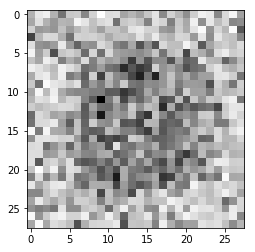

epoch: 1 gen_loss= 4.884996 dis_loss= 0.5448756


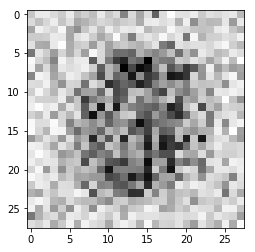

epoch: 2 gen_loss= 13.723419 dis_loss= 0.5427762


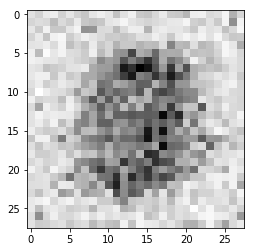

epoch: 3 gen_loss= 16.030567 dis_loss= 2.2155771


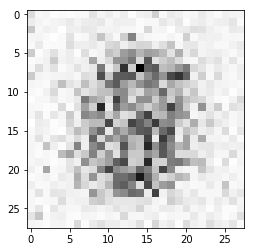

epoch: 4 gen_loss= 9.8610935 dis_loss= 0.47974405


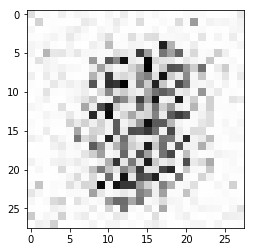

epoch: 5 gen_loss= 1.8022066 dis_loss= 2.4581137


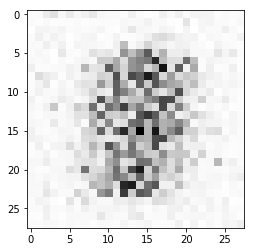

epoch: 6 gen_loss= 3.124815 dis_loss= 0.877475


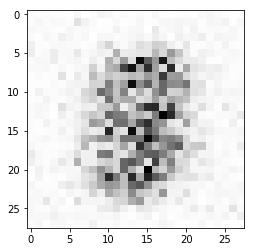

epoch: 7 gen_loss= 6.3999367 dis_loss= 0.7319803


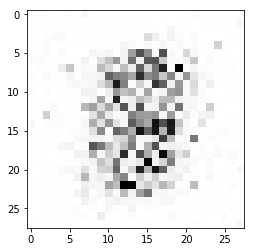

epoch: 8 gen_loss= 1.8973603 dis_loss= 0.9924062


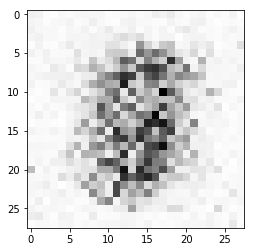

epoch: 9 gen_loss= 1.4552124 dis_loss= 3.1313941


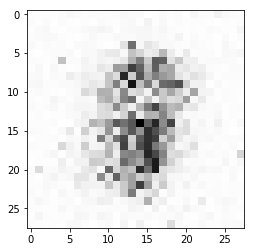

epoch: 10 gen_loss= 3.6884375 dis_loss= 0.3717533


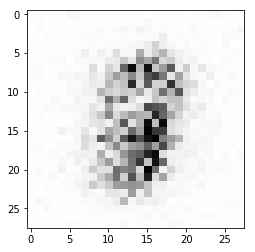

epoch: 11 gen_loss= 3.990819 dis_loss= 0.5921726


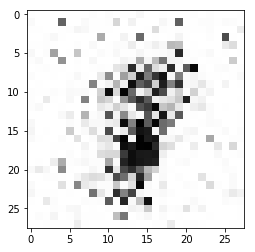

epoch: 12 gen_loss= 4.7974815 dis_loss= 0.827229


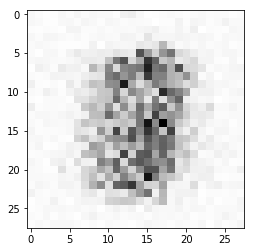

epoch: 13 gen_loss= 2.6904712 dis_loss= 1.5245879


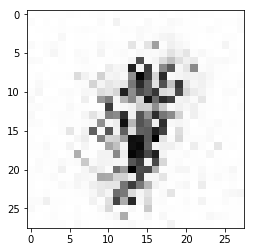

epoch: 14 gen_loss= 9.08707 dis_loss= 0.11301754


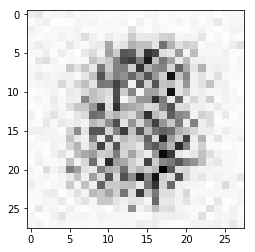

epoch: 15 gen_loss= 1.7092664 dis_loss= 2.0428658


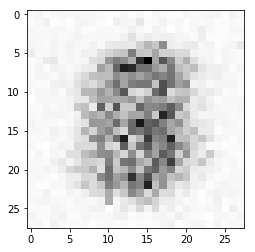

epoch: 16 gen_loss= 1.7264056 dis_loss= 1.4094234


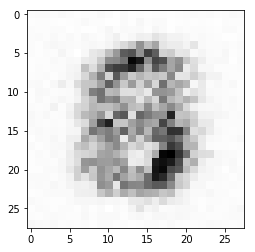

epoch: 17 gen_loss= 1.7961974 dis_loss= 0.93345076


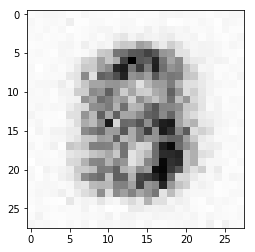

epoch: 18 gen_loss= 1.549047 dis_loss= 1.47432


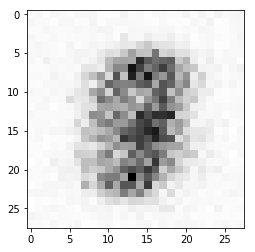

epoch: 19 gen_loss= 2.0453463 dis_loss= 0.6601199


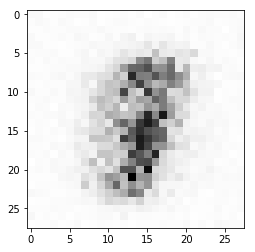

epoch: 20 gen_loss= 4.738426 dis_loss= 0.44108766


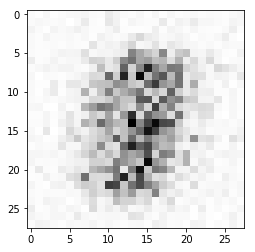

epoch: 21 gen_loss= 3.3310428 dis_loss= 0.8551256


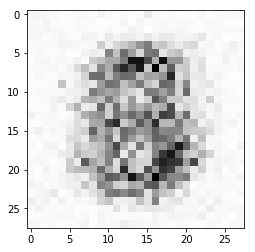

epoch: 22 gen_loss= 2.4167829 dis_loss= 1.0455056


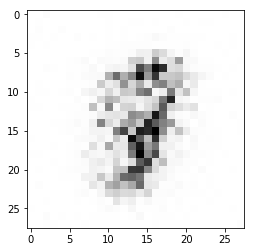

epoch: 23 gen_loss= 4.1143293 dis_loss= 0.191353


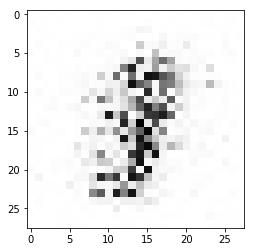

epoch: 24 gen_loss= 8.851286 dis_loss= 0.5291236


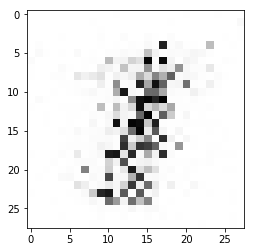

epoch: 25 gen_loss= 10.30793 dis_loss= 1.8116865


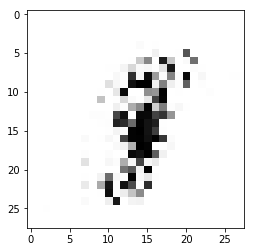

epoch: 26 gen_loss= 5.772314 dis_loss= 0.059207723


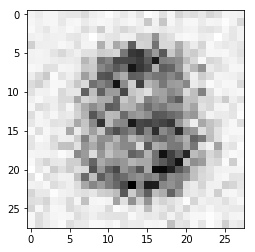

epoch: 27 gen_loss= 2.6159358 dis_loss= 0.42332125


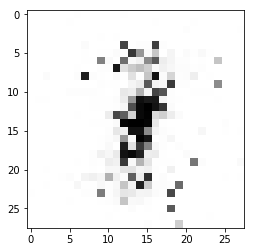

epoch: 28 gen_loss= 4.296075 dis_loss= 0.431742


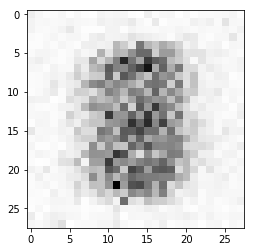

epoch: 29 gen_loss= 4.969545 dis_loss= 0.674988


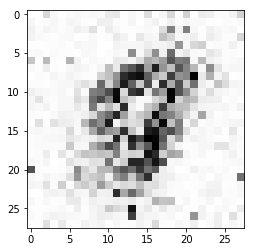

epoch: 30 gen_loss= 5.049532 dis_loss= 0.451039


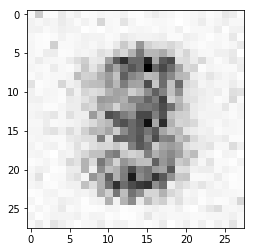

epoch: 31 gen_loss= 5.624684 dis_loss= 1.3263446


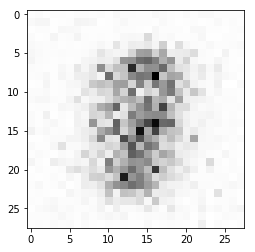

epoch: 32 gen_loss= 4.630431 dis_loss= 0.7374443


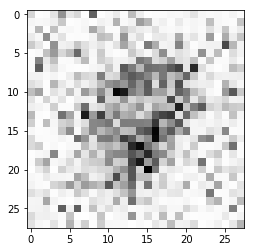

epoch: 33 gen_loss= 2.5901663 dis_loss= 1.5762746


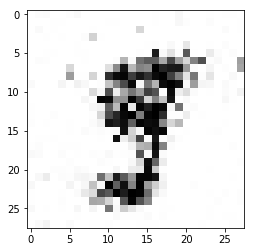

epoch: 34 gen_loss= 3.961113 dis_loss= 0.40222508


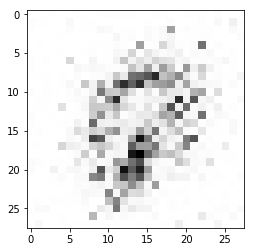

epoch: 35 gen_loss= 3.438829 dis_loss= 1.1579676


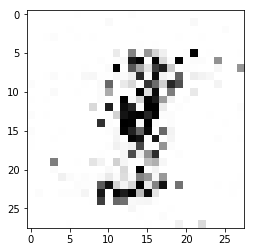

epoch: 36 gen_loss= 3.714345 dis_loss= 0.9060218


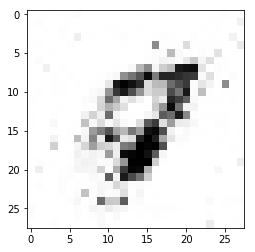

epoch: 37 gen_loss= 4.739295 dis_loss= 1.2021301


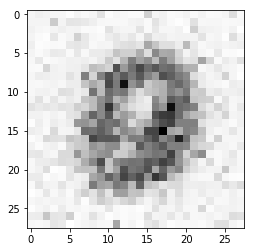

epoch: 38 gen_loss= 2.5609581 dis_loss= 0.6782405


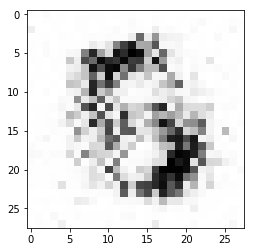

epoch: 39 gen_loss= 4.408596 dis_loss= 0.45806843


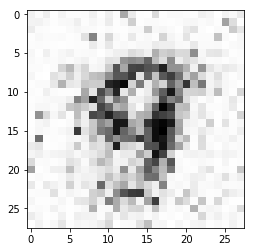

epoch: 40 gen_loss= 3.5719843 dis_loss= 1.1830143


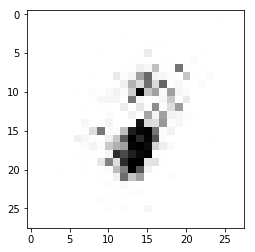

epoch: 41 gen_loss= 4.508914 dis_loss= 2.5031073


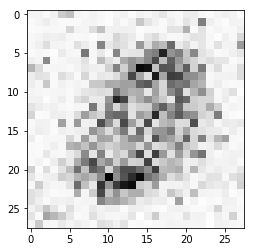

epoch: 42 gen_loss= 4.732262 dis_loss= 0.50652015


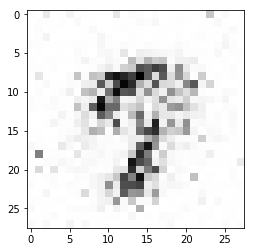

epoch: 43 gen_loss= 2.640421 dis_loss= 0.458265


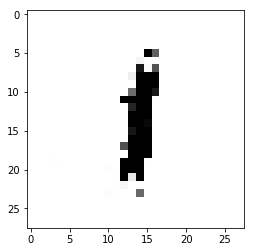

epoch: 44 gen_loss= 4.2808266 dis_loss= 0.3642096


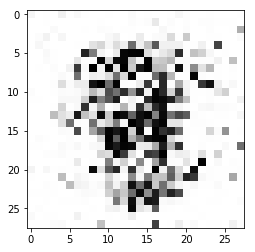

epoch: 45 gen_loss= 3.4519172 dis_loss= 0.68838334


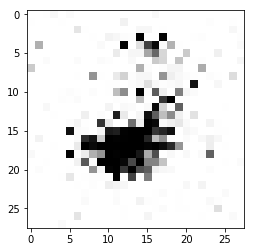

epoch: 46 gen_loss= 2.2586975 dis_loss= 0.519289


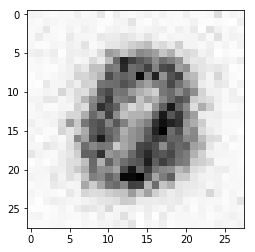

epoch: 47 gen_loss= 4.05289 dis_loss= 0.27046832


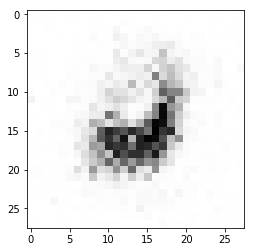

epoch: 48 gen_loss= 3.6746433 dis_loss= 0.30926186


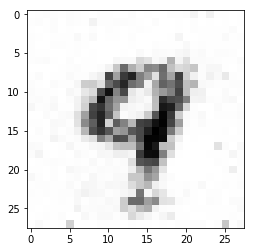

epoch: 49 gen_loss= 5.925964 dis_loss= 0.756217


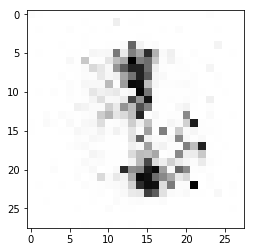

epoch: 50 gen_loss= 4.653393 dis_loss= 0.51420164


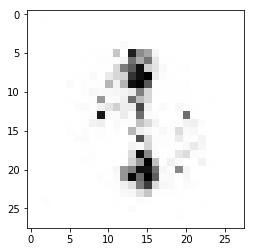

epoch: 51 gen_loss= 4.2487636 dis_loss= 0.24737264


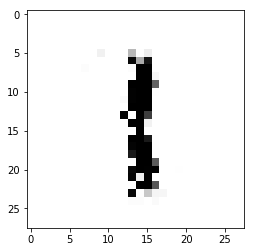

epoch: 52 gen_loss= 3.6451576 dis_loss= 0.4981116


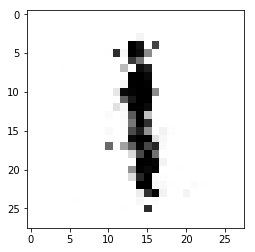

epoch: 53 gen_loss= 4.951782 dis_loss= 0.5970829


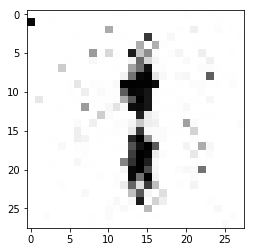

epoch: 54 gen_loss= 3.5178468 dis_loss= 0.553343


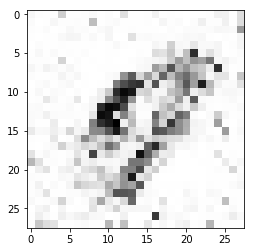

epoch: 55 gen_loss= 7.051808 dis_loss= 0.9130202


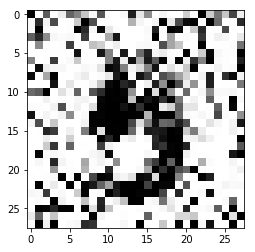

epoch: 56 gen_loss= 3.3874557 dis_loss= 0.41859466


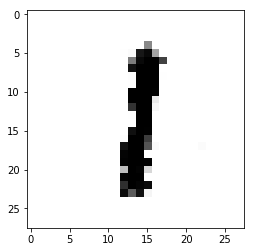

epoch: 57 gen_loss= 4.774401 dis_loss= 0.3337574


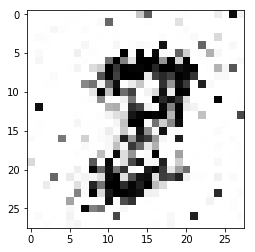

epoch: 58 gen_loss= 4.227644 dis_loss= 0.3066736


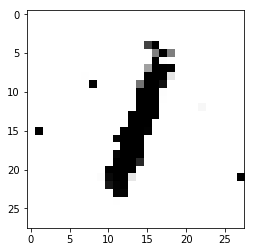

epoch: 59 gen_loss= 4.893647 dis_loss= 0.40867332


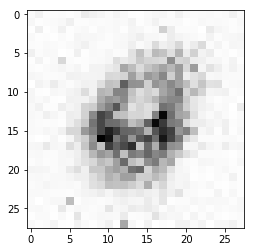

epoch: 60 gen_loss= 4.334204 dis_loss= 0.5946734


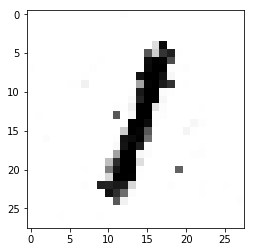

epoch: 61 gen_loss= 4.519868 dis_loss= 0.3532803


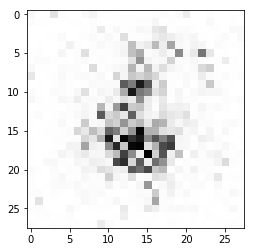

epoch: 62 gen_loss= 4.118822 dis_loss= 0.21917847


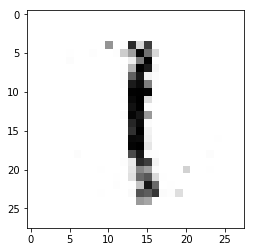

epoch: 63 gen_loss= 5.15886 dis_loss= 0.34865004


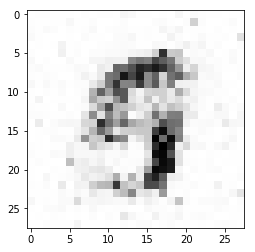

epoch: 64 gen_loss= 3.7895641 dis_loss= 0.584298


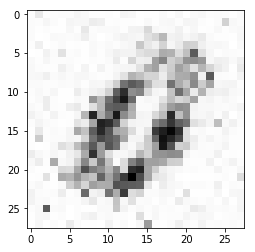

epoch: 65 gen_loss= 3.9833484 dis_loss= 0.31305915


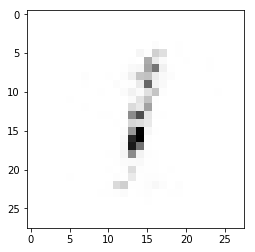

epoch: 66 gen_loss= 3.5123713 dis_loss= 0.32683364


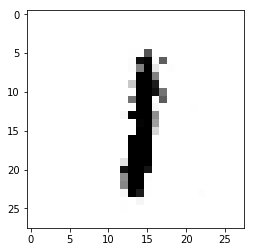

epoch: 67 gen_loss= 4.738462 dis_loss= 0.36668196


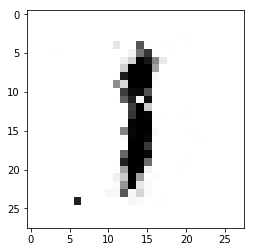

epoch: 68 gen_loss= 3.4388847 dis_loss= 0.37735027


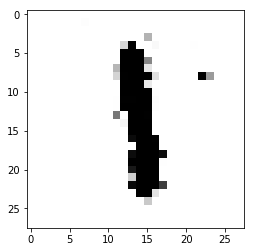

epoch: 69 gen_loss= 4.116311 dis_loss= 0.45172846


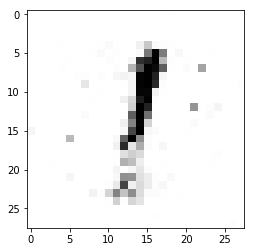

epoch: 70 gen_loss= 4.372467 dis_loss= 0.41770068


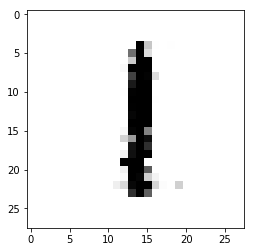

epoch: 71 gen_loss= 3.1095595 dis_loss= 0.54728997


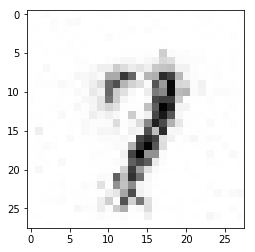

epoch: 72 gen_loss= 3.3033772 dis_loss= 0.44660074


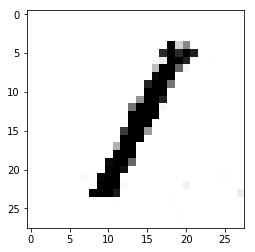

epoch: 73 gen_loss= 2.9136262 dis_loss= 0.53634614


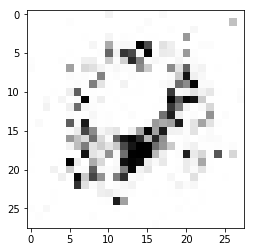

epoch: 74 gen_loss= 3.0948489 dis_loss= 0.32505757


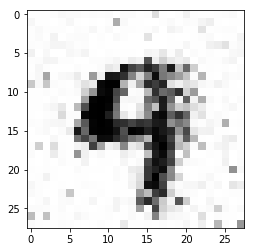

epoch: 75 gen_loss= 3.2073164 dis_loss= 0.36795342


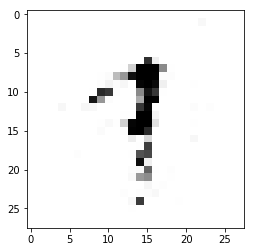

epoch: 76 gen_loss= 3.3783178 dis_loss= 0.39065894


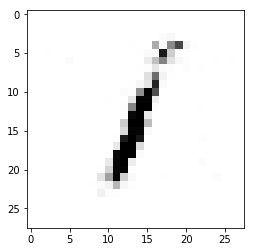

epoch: 77 gen_loss= 2.1607678 dis_loss= 0.5904296


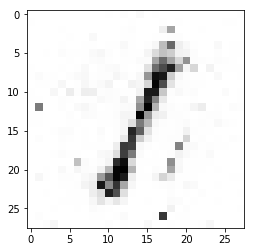

epoch: 78 gen_loss= 3.006466 dis_loss= 0.3455941


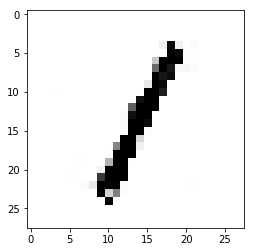

epoch: 79 gen_loss= 2.3383698 dis_loss= 0.516533


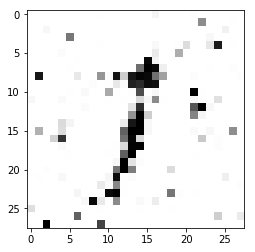

epoch: 80 gen_loss= 3.079569 dis_loss= 0.33388042


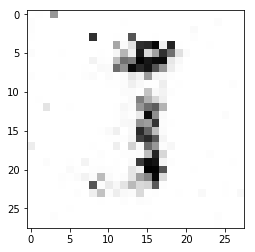

epoch: 81 gen_loss= 2.8322022 dis_loss= 0.46487796


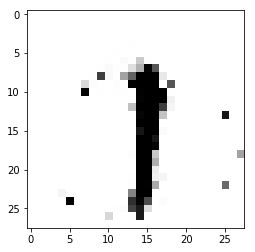

epoch: 82 gen_loss= 2.3267896 dis_loss= 0.4176756


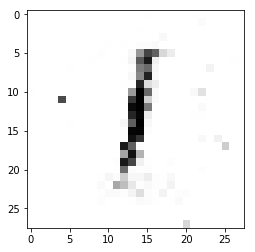

epoch: 83 gen_loss= 2.7363706 dis_loss= 0.48745233


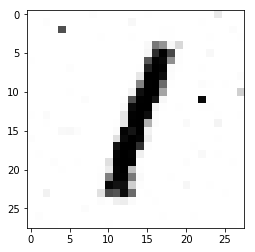

epoch: 84 gen_loss= 3.4253697 dis_loss= 0.42518583


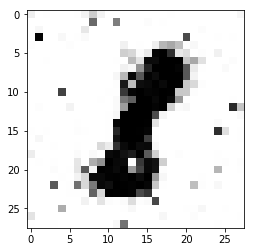

epoch: 85 gen_loss= 3.6253088 dis_loss= 0.42692727


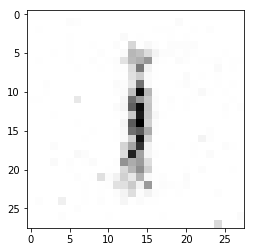

epoch: 86 gen_loss= 2.8569267 dis_loss= 0.36886424


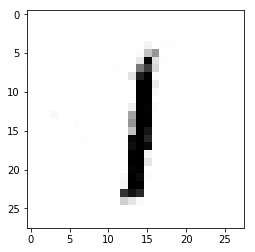

epoch: 87 gen_loss= 3.672631 dis_loss= 0.37433314


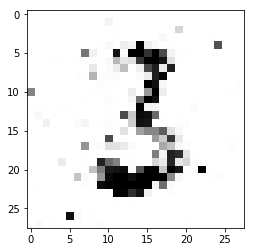

epoch: 88 gen_loss= 2.9595838 dis_loss= 0.53190863


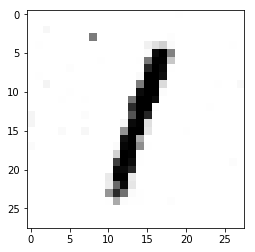

epoch: 89 gen_loss= 2.2305217 dis_loss= 0.43601757


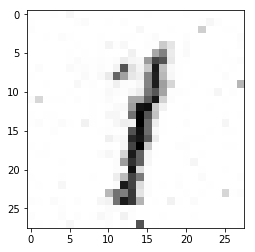

epoch: 90 gen_loss= 3.2172942 dis_loss= 0.48721182


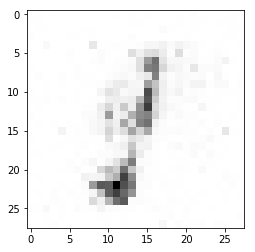

epoch: 91 gen_loss= 2.6721184 dis_loss= 0.44932124


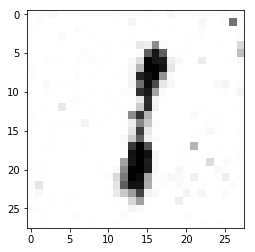

epoch: 92 gen_loss= 2.943102 dis_loss= 0.4785988


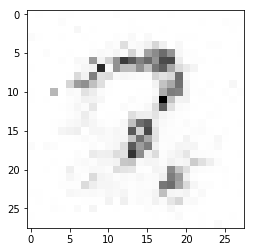

epoch: 93 gen_loss= 2.2701273 dis_loss= 0.627004


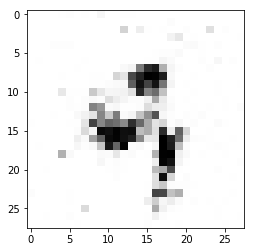

epoch: 94 gen_loss= 2.2545247 dis_loss= 0.5950376


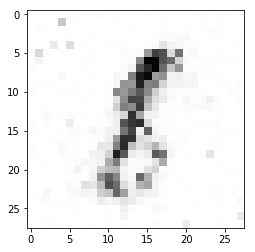

epoch: 95 gen_loss= 2.9821777 dis_loss= 0.49970558


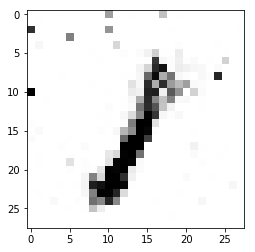

epoch: 96 gen_loss= 2.3323722 dis_loss= 0.5817417


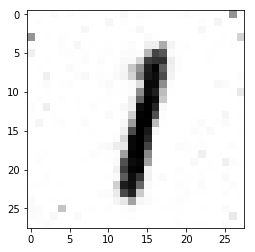

epoch: 97 gen_loss= 2.504373 dis_loss= 0.60796386


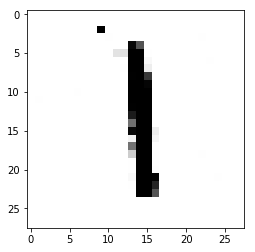

epoch: 98 gen_loss= 2.681375 dis_loss= 0.45126972


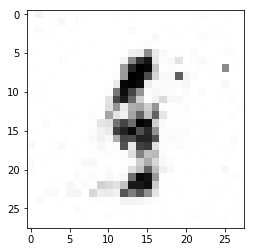

epoch: 99 gen_loss= 2.6771793 dis_loss= 0.5006416


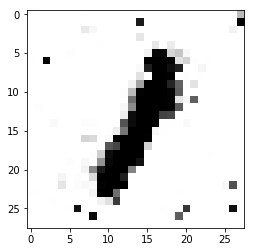

epoch: 100 gen_loss= 2.2607512 dis_loss= 0.41046655


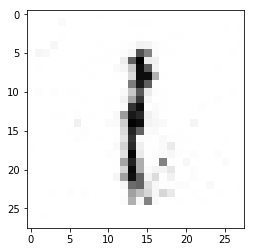

epoch: 101 gen_loss= 2.5571442 dis_loss= 0.4568352


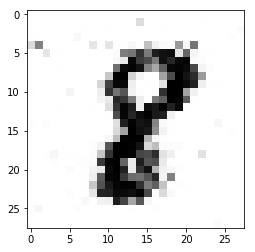

epoch: 102 gen_loss= 2.5977795 dis_loss= 0.49181992


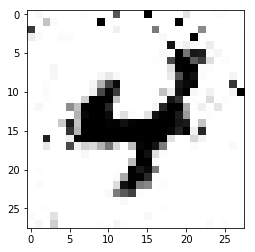

epoch: 103 gen_loss= 2.1671245 dis_loss= 0.6217482


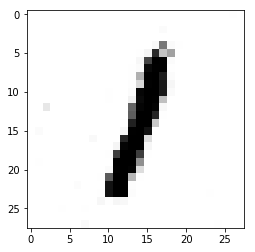

epoch: 104 gen_loss= 3.1543598 dis_loss= 0.45622945


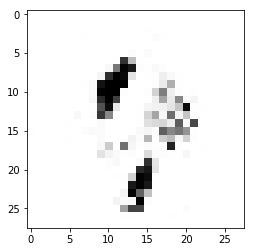

epoch: 105 gen_loss= 2.0157225 dis_loss= 0.5721933


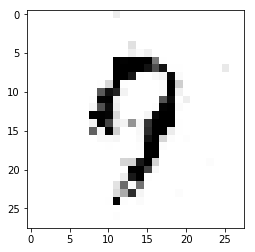

epoch: 106 gen_loss= 2.6983361 dis_loss= 0.55520713


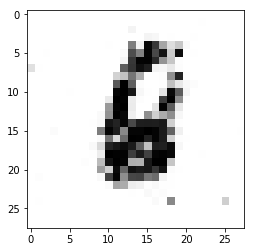

epoch: 107 gen_loss= 2.562519 dis_loss= 0.4604358


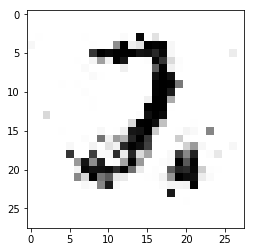

epoch: 108 gen_loss= 2.4798763 dis_loss= 0.67653364


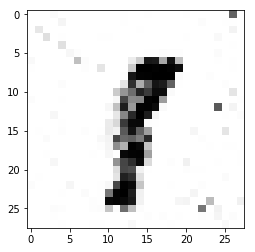

epoch: 109 gen_loss= 2.4321938 dis_loss= 0.50199485


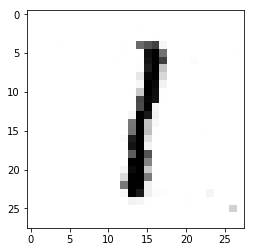

epoch: 110 gen_loss= 2.1858842 dis_loss= 0.5714886


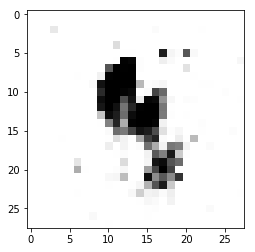

epoch: 111 gen_loss= 2.3513918 dis_loss= 0.4997993


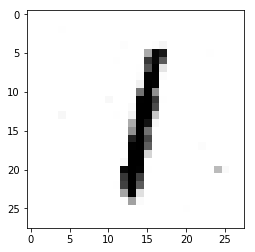

epoch: 112 gen_loss= 2.2518609 dis_loss= 0.4969391


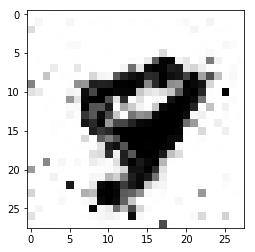

epoch: 113 gen_loss= 3.1832147 dis_loss= 0.46362135


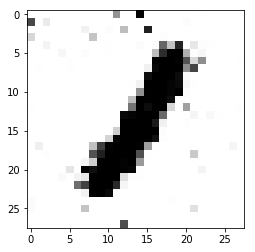

epoch: 114 gen_loss= 2.697472 dis_loss= 0.5881532


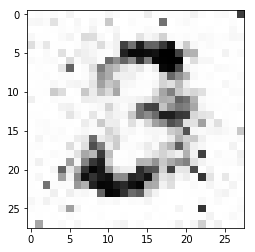

epoch: 115 gen_loss= 2.3107476 dis_loss= 0.6002109


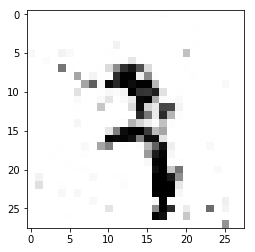

epoch: 116 gen_loss= 3.0795586 dis_loss= 0.5115546


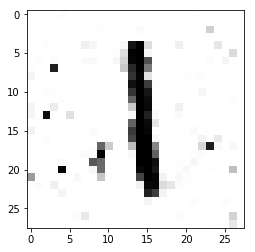

epoch: 117 gen_loss= 2.3864124 dis_loss= 0.505635


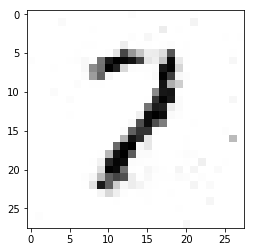

epoch: 118 gen_loss= 2.3757424 dis_loss= 0.5601561


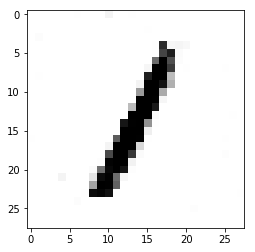

epoch: 119 gen_loss= 2.4646826 dis_loss= 0.6007082


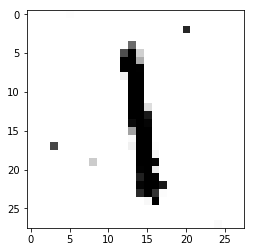

epoch: 120 gen_loss= 2.0924928 dis_loss= 0.5883062


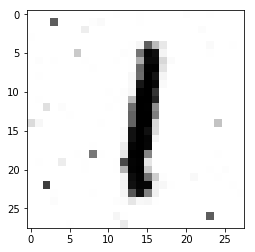

epoch: 121 gen_loss= 2.4256897 dis_loss= 0.652957


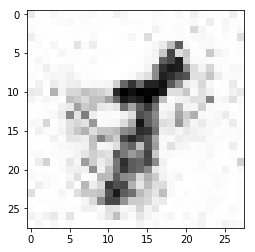

epoch: 122 gen_loss= 2.1796951 dis_loss= 0.5336585


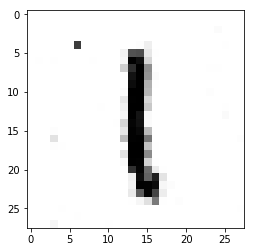

epoch: 123 gen_loss= 2.4004252 dis_loss= 0.57271105


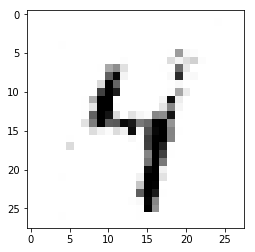

epoch: 124 gen_loss= 2.7168095 dis_loss= 0.5660786


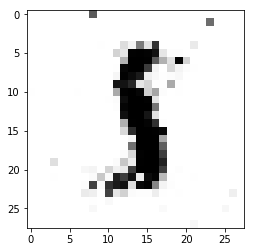

epoch: 125 gen_loss= 2.2501583 dis_loss= 0.5518824


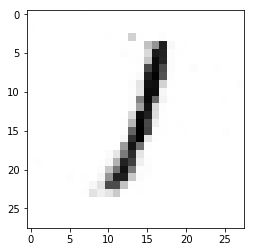

epoch: 126 gen_loss= 1.8852032 dis_loss= 0.59623945


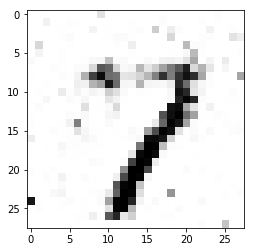

epoch: 127 gen_loss= 2.4553947 dis_loss= 0.5550788


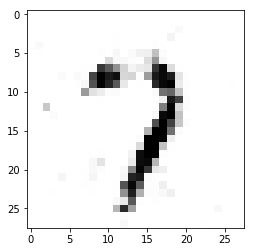

epoch: 128 gen_loss= 2.9016583 dis_loss= 0.680066


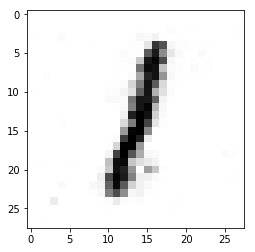

epoch: 129 gen_loss= 2.3953161 dis_loss= 0.6386055


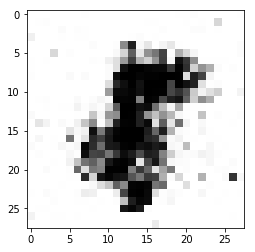

epoch: 130 gen_loss= 2.5501776 dis_loss= 0.5437287


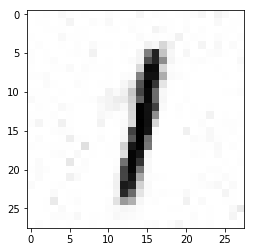

epoch: 131 gen_loss= 2.0718164 dis_loss= 0.6384599


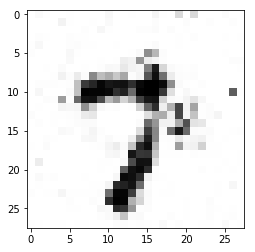

epoch: 132 gen_loss= 2.4289732 dis_loss= 0.5493934


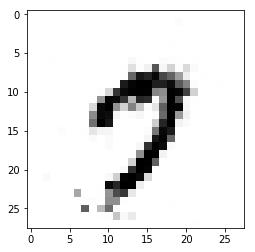

epoch: 133 gen_loss= 2.414895 dis_loss= 0.6142176


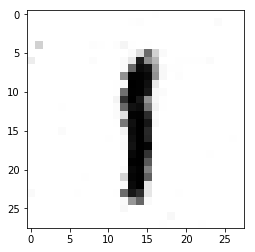

epoch: 134 gen_loss= 2.5454416 dis_loss= 0.6306302


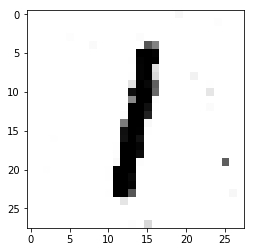

epoch: 135 gen_loss= 2.3622465 dis_loss= 0.5164683


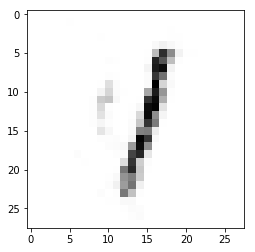

epoch: 136 gen_loss= 2.7451894 dis_loss= 0.75014716


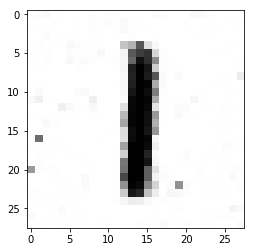

epoch: 137 gen_loss= 2.1724749 dis_loss= 0.56905997


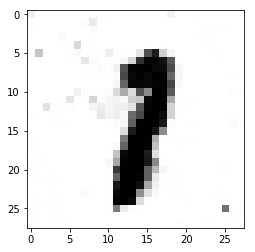

epoch: 138 gen_loss= 2.198019 dis_loss= 0.5924382


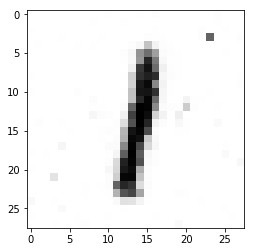

epoch: 139 gen_loss= 2.3320265 dis_loss= 0.58212185


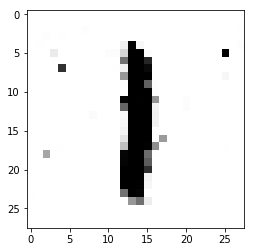

epoch: 140 gen_loss= 2.3452587 dis_loss= 0.5753572


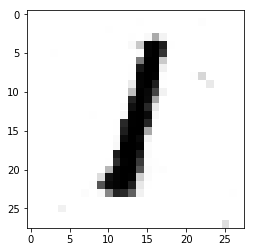

epoch: 141 gen_loss= 2.6416137 dis_loss= 0.560369


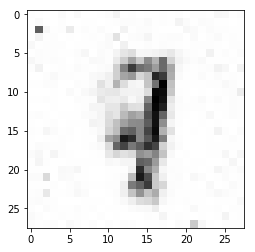

epoch: 142 gen_loss= 1.9694272 dis_loss= 0.5867248


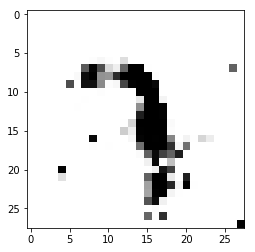

epoch: 143 gen_loss= 2.2575402 dis_loss= 0.56142163


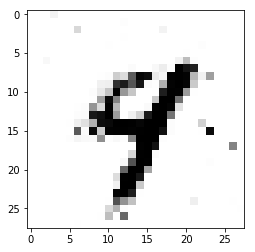

epoch: 144 gen_loss= 2.3652205 dis_loss= 0.49603617


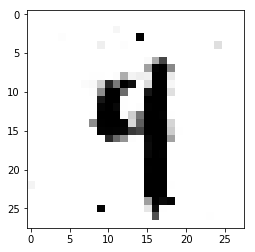

epoch: 145 gen_loss= 2.088901 dis_loss= 0.60075593


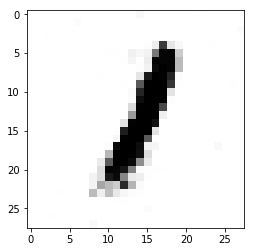

epoch: 146 gen_loss= 2.4084501 dis_loss= 0.5585221


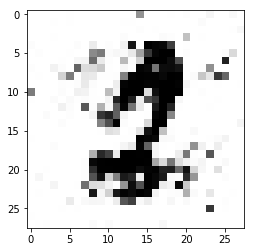

epoch: 147 gen_loss= 2.0037646 dis_loss= 0.4997442


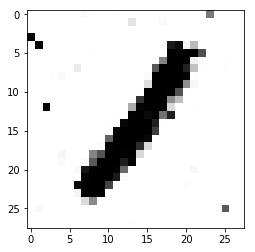

epoch: 148 gen_loss= 2.3425329 dis_loss= 0.66404337


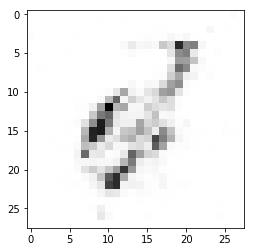

epoch: 149 gen_loss= 2.0451694 dis_loss= 0.5794862


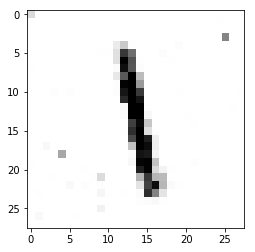

epoch: 150 gen_loss= 2.3070045 dis_loss= 0.5925783


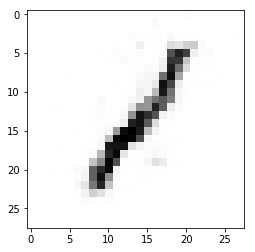

epoch: 151 gen_loss= 2.1721203 dis_loss= 0.59110844


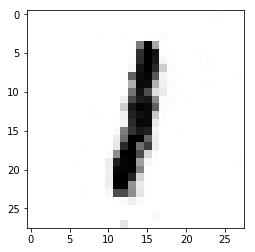

epoch: 152 gen_loss= 2.132553 dis_loss= 0.61475694


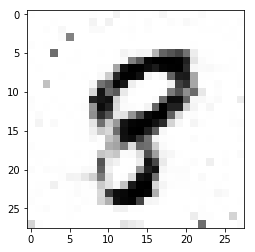

epoch: 153 gen_loss= 2.4890032 dis_loss= 0.5670146


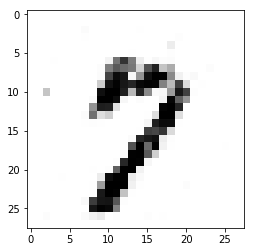

epoch: 154 gen_loss= 2.1986692 dis_loss= 0.63779455


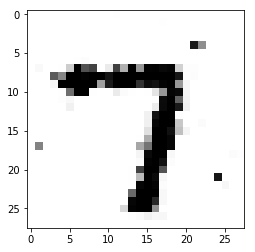

epoch: 155 gen_loss= 2.4378898 dis_loss= 0.5784631


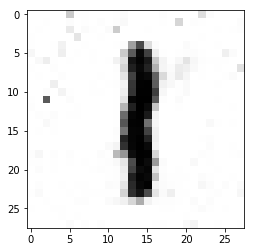

epoch: 156 gen_loss= 2.5396276 dis_loss= 0.6439465


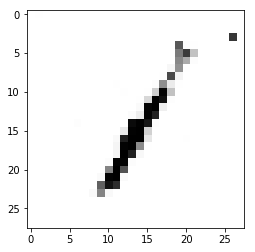

epoch: 157 gen_loss= 2.9232259 dis_loss= 0.42584544


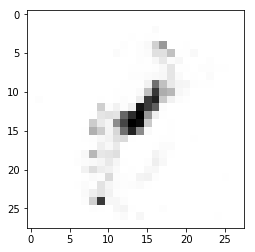

epoch: 158 gen_loss= 2.0825324 dis_loss= 0.64365447


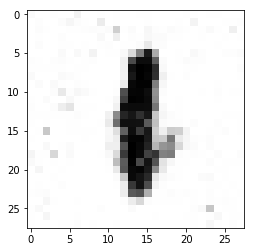

epoch: 159 gen_loss= 2.3211634 dis_loss= 0.60344124


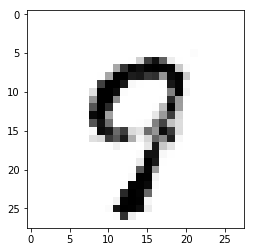

epoch: 160 gen_loss= 2.264532 dis_loss= 0.5869264


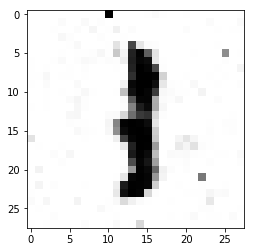

epoch: 161 gen_loss= 2.2680035 dis_loss= 0.50724447


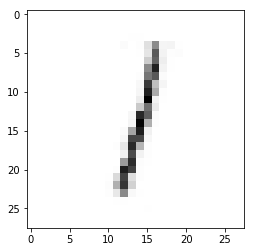

epoch: 162 gen_loss= 2.6692033 dis_loss= 0.50825226


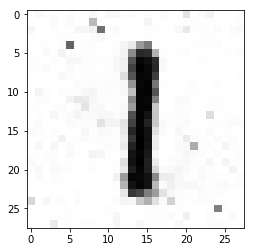

epoch: 163 gen_loss= 2.766212 dis_loss= 0.7105457


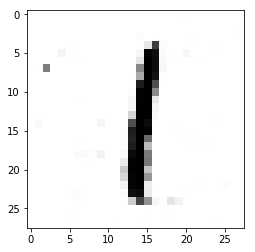

epoch: 164 gen_loss= 1.849091 dis_loss= 0.52390766


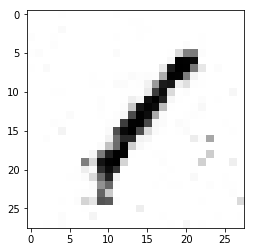

epoch: 165 gen_loss= 2.2962942 dis_loss= 0.6136128


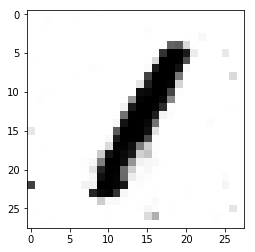

epoch: 166 gen_loss= 2.2712615 dis_loss= 0.66655916


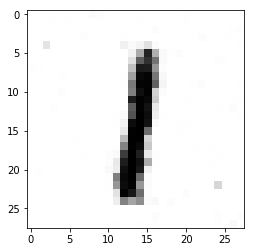

epoch: 167 gen_loss= 2.0343447 dis_loss= 0.64014935


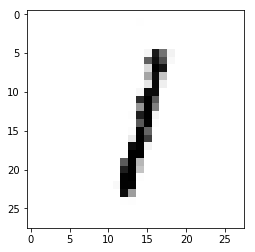

epoch: 168 gen_loss= 2.2029524 dis_loss= 0.68838924


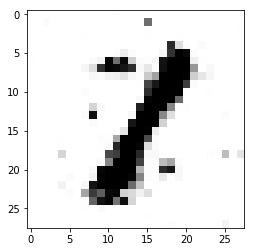

epoch: 169 gen_loss= 2.4511657 dis_loss= 0.6636568


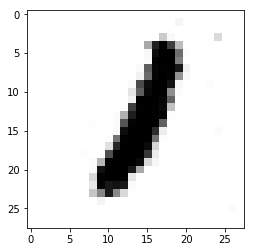

epoch: 170 gen_loss= 2.504013 dis_loss= 0.7585578


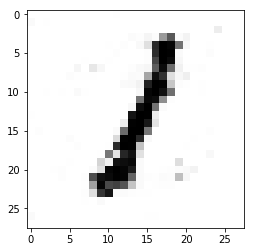

epoch: 171 gen_loss= 2.247128 dis_loss= 0.53524196


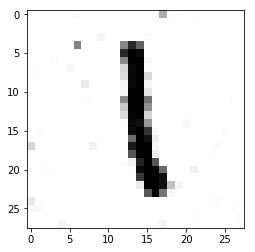

epoch: 172 gen_loss= 2.2174342 dis_loss= 0.60296935


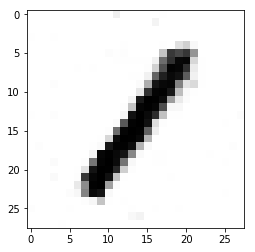

epoch: 173 gen_loss= 2.0697834 dis_loss= 0.68391633


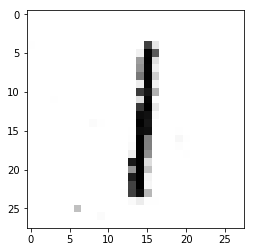

epoch: 174 gen_loss= 2.132208 dis_loss= 0.6963347


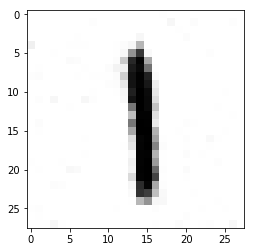

epoch: 175 gen_loss= 1.8632007 dis_loss= 0.73825276


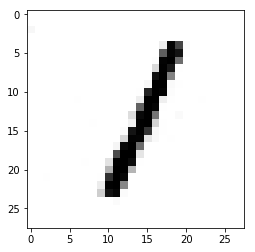

epoch: 176 gen_loss= 1.9826432 dis_loss= 0.60180485


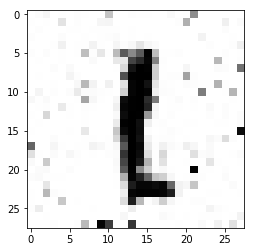

epoch: 177 gen_loss= 1.9465803 dis_loss= 0.61462516


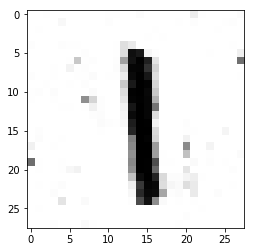

epoch: 178 gen_loss= 1.7885417 dis_loss= 0.60657257


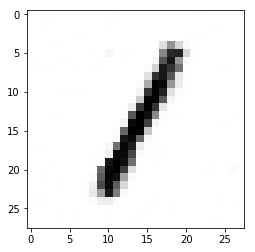

epoch: 179 gen_loss= 1.935361 dis_loss= 0.69730496


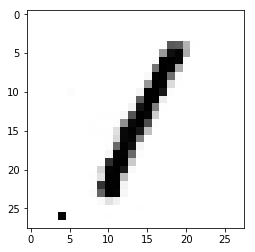

epoch: 180 gen_loss= 2.1136317 dis_loss= 0.5508189


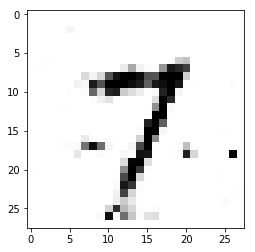

epoch: 181 gen_loss= 2.1131992 dis_loss= 0.6816319


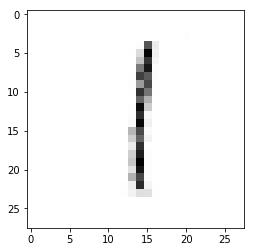

epoch: 182 gen_loss= 2.1775029 dis_loss= 0.64317256


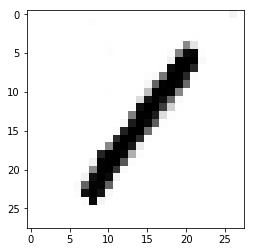

epoch: 183 gen_loss= 2.123773 dis_loss= 0.63587433


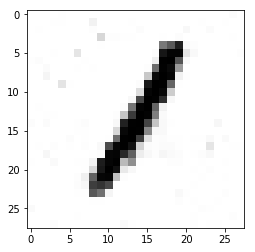

epoch: 184 gen_loss= 2.2118368 dis_loss= 0.65313685


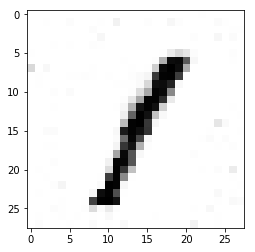

epoch: 185 gen_loss= 2.0450091 dis_loss= 0.6012657


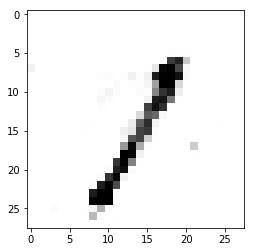

epoch: 186 gen_loss= 2.1718245 dis_loss= 0.5701791


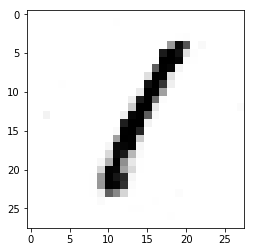

epoch: 187 gen_loss= 1.8545403 dis_loss= 0.6784264


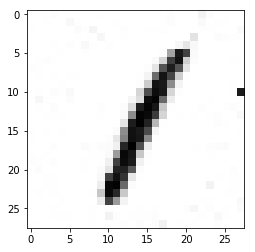

epoch: 188 gen_loss= 2.187629 dis_loss= 0.48239392


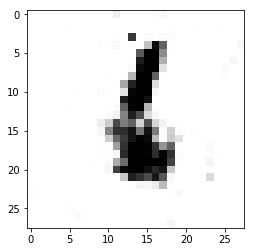

epoch: 189 gen_loss= 1.989981 dis_loss= 0.6530757


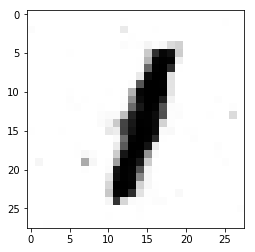

epoch: 190 gen_loss= 2.529975 dis_loss= 0.6863846


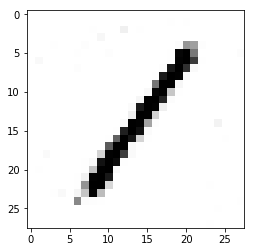

epoch: 191 gen_loss= 2.1303985 dis_loss= 0.5945358


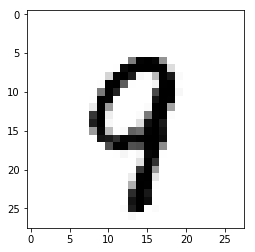

epoch: 192 gen_loss= 2.333385 dis_loss= 0.5836071


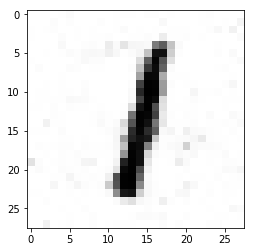

epoch: 193 gen_loss= 1.8648739 dis_loss= 0.65203464


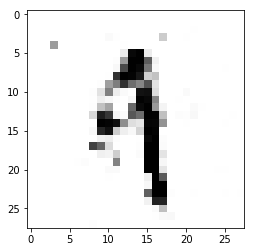

epoch: 194 gen_loss= 2.1850235 dis_loss= 0.51421374


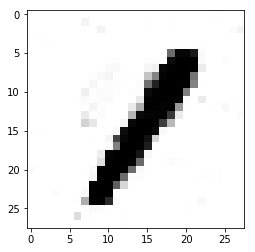

epoch: 195 gen_loss= 2.1052978 dis_loss= 0.56103706


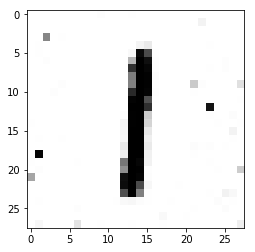

epoch: 196 gen_loss= 1.9244361 dis_loss= 0.703179


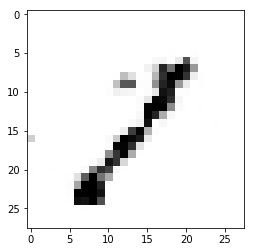

epoch: 197 gen_loss= 2.2824929 dis_loss= 0.7155875


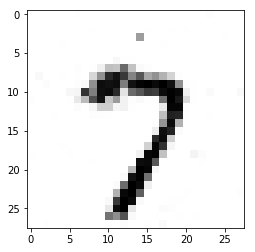

epoch: 198 gen_loss= 2.110554 dis_loss= 0.7354739


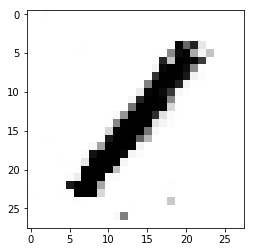

epoch: 199 gen_loss= 1.8411736 dis_loss= 0.7296379


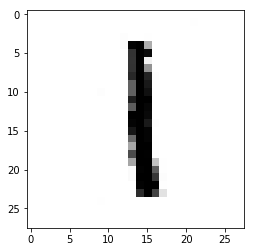

epoch: 200 gen_loss= 2.1596122 dis_loss= 0.7866925


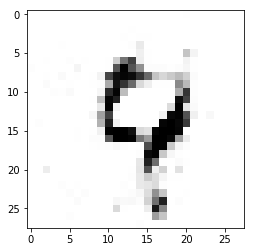

epoch: 201 gen_loss= 2.3173637 dis_loss= 0.6173426


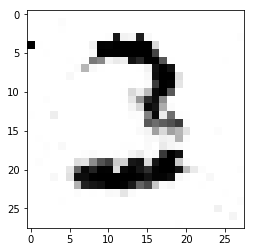

epoch: 202 gen_loss= 2.478362 dis_loss= 0.5980209


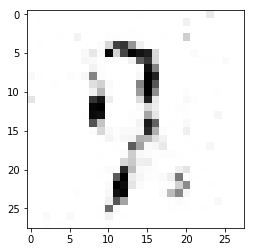

epoch: 203 gen_loss= 2.1315296 dis_loss= 0.7088082


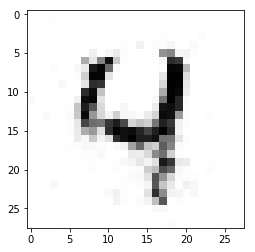

epoch: 204 gen_loss= 2.057545 dis_loss= 0.6196388


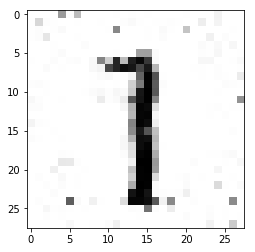

epoch: 205 gen_loss= 1.9743307 dis_loss= 0.58477044


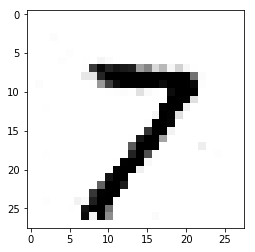

epoch: 206 gen_loss= 1.9226418 dis_loss= 0.7573929


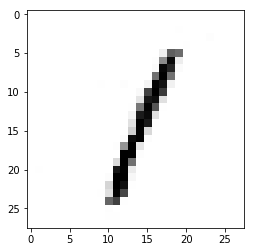

epoch: 207 gen_loss= 2.371366 dis_loss= 0.5761471


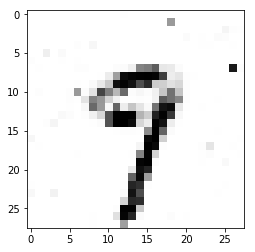

epoch: 208 gen_loss= 1.8127986 dis_loss= 0.6980019


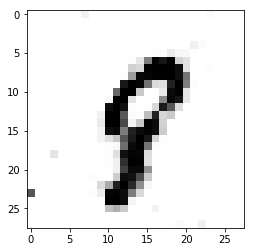

epoch: 209 gen_loss= 2.0592813 dis_loss= 0.726867


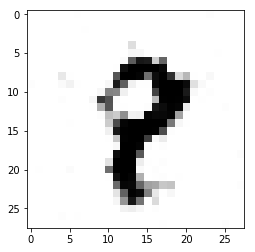

epoch: 210 gen_loss= 2.0176291 dis_loss= 0.6853685


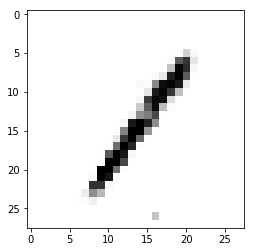

epoch: 211 gen_loss= 1.9766624 dis_loss= 0.7176962


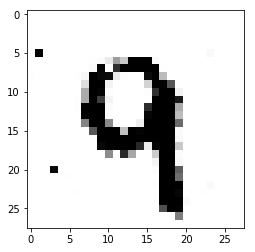

epoch: 212 gen_loss= 2.4314342 dis_loss= 0.6142123


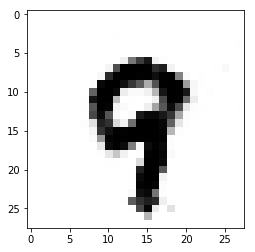

epoch: 213 gen_loss= 2.1231465 dis_loss= 0.65077007


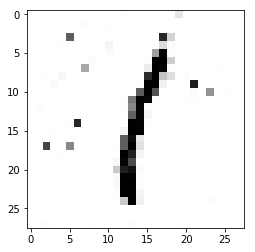

epoch: 214 gen_loss= 1.7770863 dis_loss= 0.781252


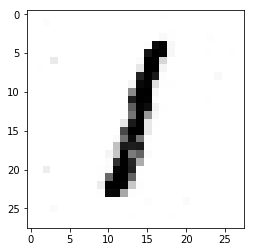

epoch: 215 gen_loss= 1.9021358 dis_loss= 0.65138495


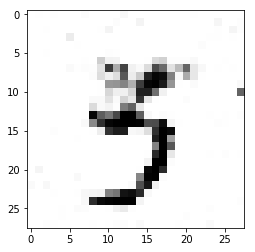

epoch: 216 gen_loss= 1.8203715 dis_loss= 0.80950487


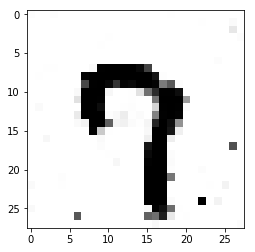

epoch: 217 gen_loss= 1.7943218 dis_loss= 0.76291853


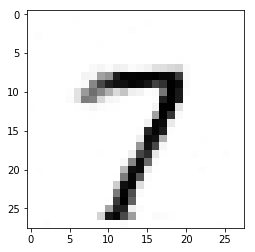

epoch: 218 gen_loss= 2.646625 dis_loss= 0.65584064


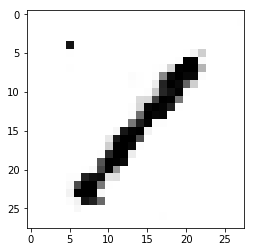

epoch: 219 gen_loss= 1.8620756 dis_loss= 0.6556487


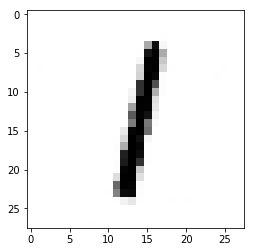

epoch: 220 gen_loss= 1.7011689 dis_loss= 0.7957853


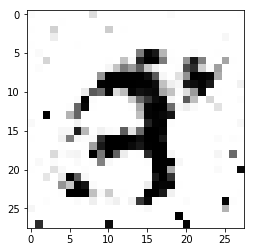

epoch: 221 gen_loss= 2.2972648 dis_loss= 0.6034288


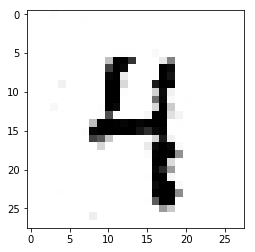

epoch: 222 gen_loss= 2.1216404 dis_loss= 0.7080662


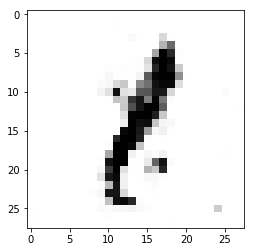

epoch: 223 gen_loss= 2.100287 dis_loss= 0.71064186


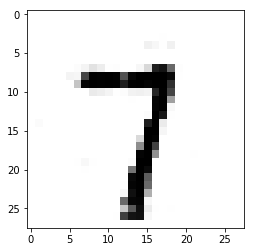

epoch: 224 gen_loss= 1.9826508 dis_loss= 0.7027418


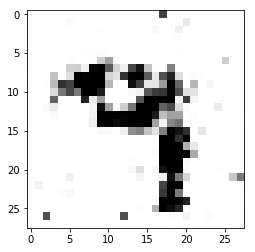

epoch: 225 gen_loss= 1.992904 dis_loss= 0.65895915


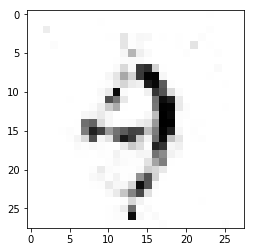

epoch: 226 gen_loss= 2.092799 dis_loss= 0.6375767


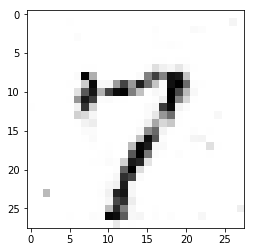

epoch: 227 gen_loss= 1.9555666 dis_loss= 0.6775929


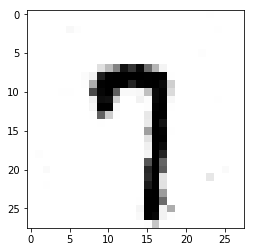

epoch: 228 gen_loss= 2.0384629 dis_loss= 0.55036956


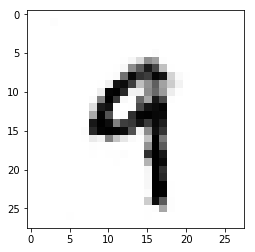

epoch: 229 gen_loss= 2.3014627 dis_loss= 0.659055


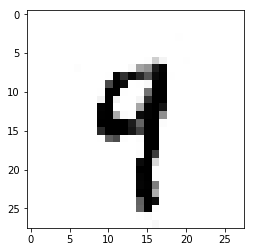

epoch: 230 gen_loss= 1.9774026 dis_loss= 0.69132984


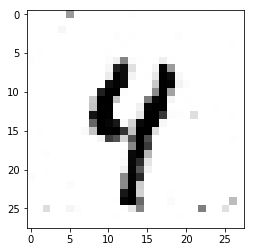

epoch: 231 gen_loss= 1.937156 dis_loss= 0.75349045


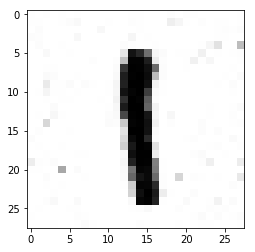

epoch: 232 gen_loss= 2.1503394 dis_loss= 0.6942227


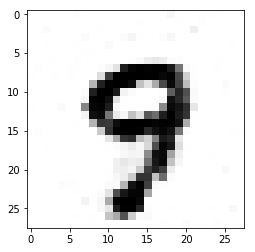

epoch: 233 gen_loss= 1.7231731 dis_loss= 0.6201299


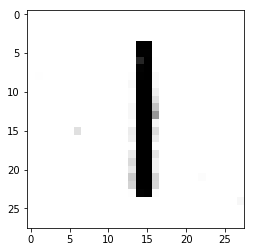

epoch: 234 gen_loss= 1.8578024 dis_loss= 0.70805585


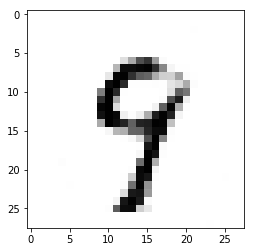

epoch: 235 gen_loss= 2.161406 dis_loss= 0.68572456


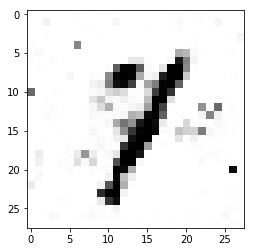

epoch: 236 gen_loss= 1.829938 dis_loss= 0.6151814


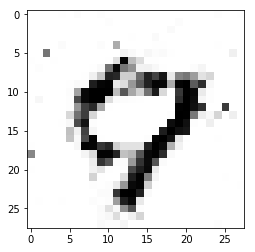

epoch: 237 gen_loss= 1.927249 dis_loss= 0.66627383


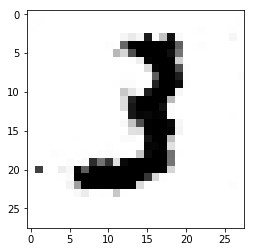

epoch: 238 gen_loss= 2.1692538 dis_loss= 0.67369926


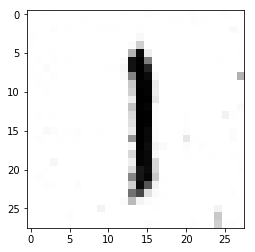

epoch: 239 gen_loss= 2.128474 dis_loss= 0.70753837


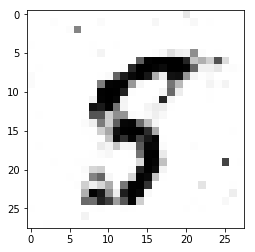

epoch: 240 gen_loss= 2.0869324 dis_loss= 0.7209847


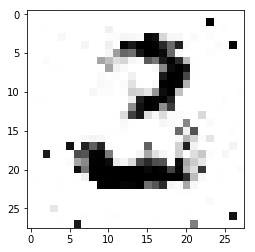

epoch: 241 gen_loss= 2.1417258 dis_loss= 0.6901297


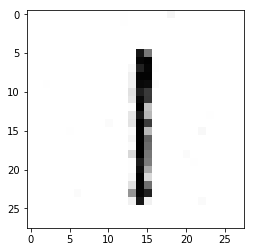

epoch: 242 gen_loss= 2.2982054 dis_loss= 0.68991524


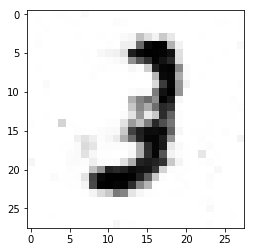

epoch: 243 gen_loss= 1.7238522 dis_loss= 0.68108195


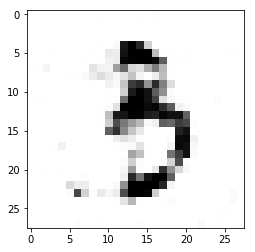

epoch: 244 gen_loss= 1.7835498 dis_loss= 0.6581228


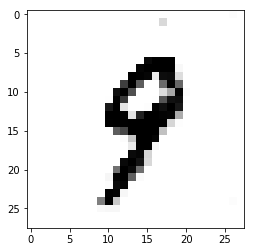

epoch: 245 gen_loss= 1.7549798 dis_loss= 0.6231956


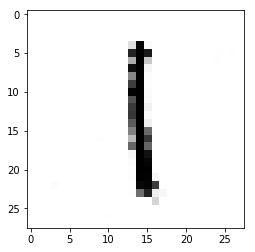

epoch: 246 gen_loss= 1.6563778 dis_loss= 0.749992


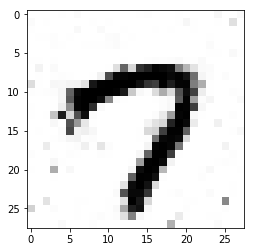

epoch: 247 gen_loss= 1.8450572 dis_loss= 0.73215437


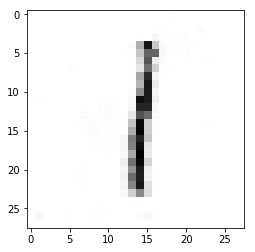

epoch: 248 gen_loss= 2.0103033 dis_loss= 0.6262549


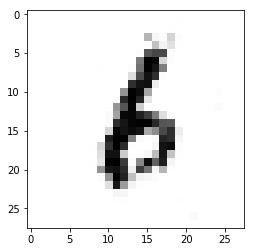

epoch: 249 gen_loss= 2.114121 dis_loss= 0.55302346


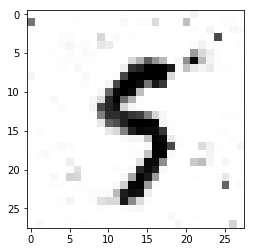

epoch: 250 gen_loss= 2.1695838 dis_loss= 0.65429735


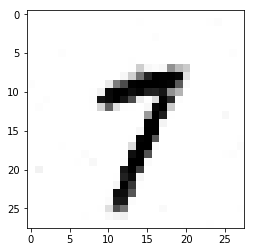

epoch: 251 gen_loss= 2.2793 dis_loss= 0.6584703


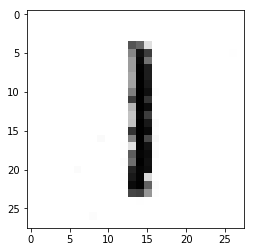

epoch: 252 gen_loss= 2.1033413 dis_loss= 0.62809455


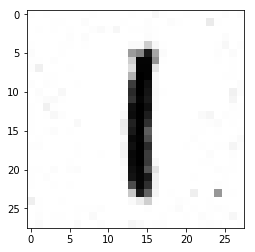

epoch: 253 gen_loss= 2.2876914 dis_loss= 0.5802673


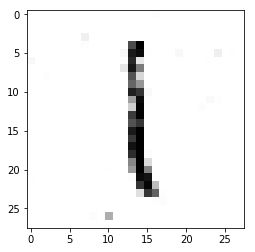

epoch: 254 gen_loss= 1.814182 dis_loss= 0.7685367


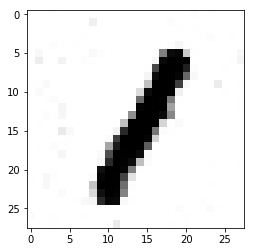

epoch: 255 gen_loss= 1.8626297 dis_loss= 0.7156147


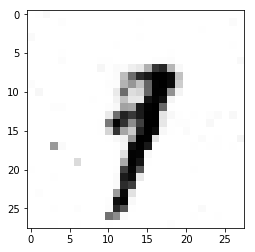

epoch: 256 gen_loss= 2.083846 dis_loss= 0.7174908


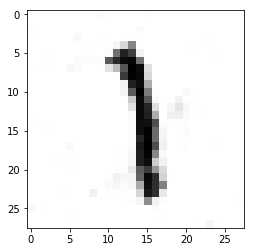

epoch: 257 gen_loss= 2.4285417 dis_loss= 0.5998649


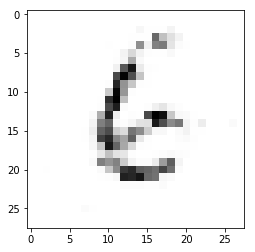

epoch: 258 gen_loss= 2.0656338 dis_loss= 0.7180294


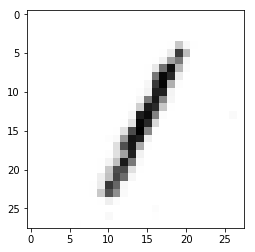

epoch: 259 gen_loss= 2.0379076 dis_loss= 0.6237693


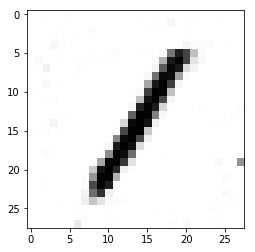

epoch: 260 gen_loss= 2.3194952 dis_loss= 0.6493581


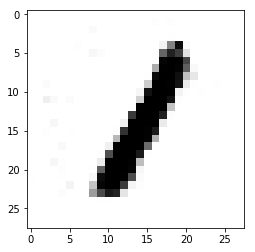

epoch: 261 gen_loss= 2.2803922 dis_loss= 0.6529993


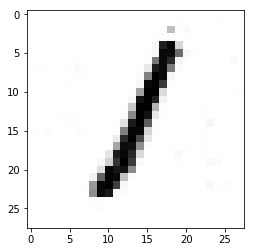

epoch: 262 gen_loss= 1.914561 dis_loss= 0.69461274


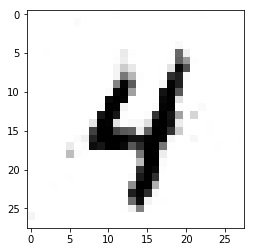

epoch: 263 gen_loss= 1.8216642 dis_loss= 0.7792643


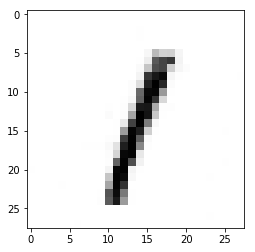

epoch: 264 gen_loss= 1.8556297 dis_loss= 0.74908674


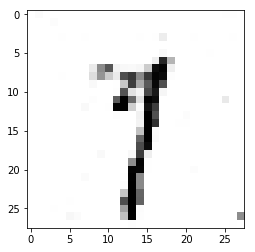

epoch: 265 gen_loss= 1.6795399 dis_loss= 0.7637867


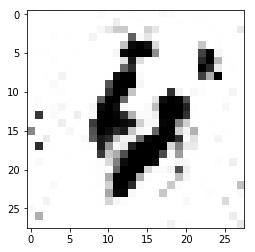

epoch: 266 gen_loss= 2.0843053 dis_loss= 0.7144893


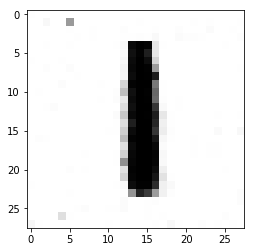

epoch: 267 gen_loss= 2.2151787 dis_loss= 0.6122386


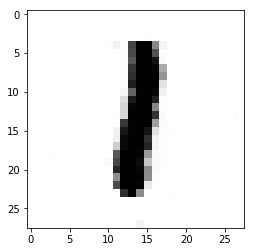

epoch: 268 gen_loss= 2.2849872 dis_loss= 0.63718164


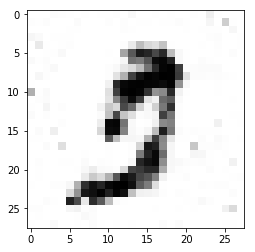

epoch: 269 gen_loss= 1.9591343 dis_loss= 0.67308974


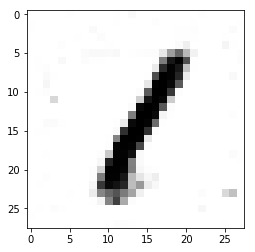

epoch: 270 gen_loss= 2.0098538 dis_loss= 0.71517265


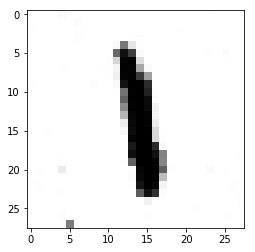

epoch: 271 gen_loss= 1.8571706 dis_loss= 0.64019513


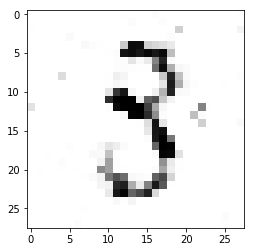

epoch: 272 gen_loss= 2.4374726 dis_loss= 0.6789539


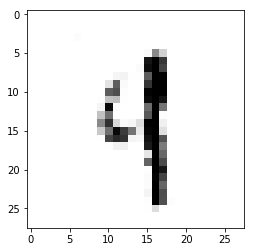

epoch: 273 gen_loss= 1.6529082 dis_loss= 0.85938513


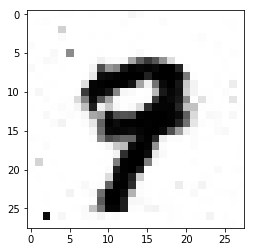

epoch: 274 gen_loss= 1.9739833 dis_loss= 0.6605582


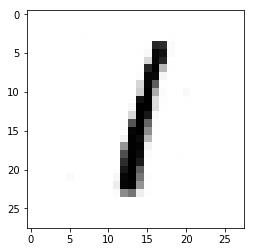

epoch: 275 gen_loss= 2.0415516 dis_loss= 0.72404325


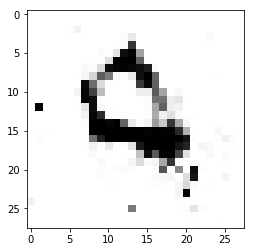

epoch: 276 gen_loss= 1.8519821 dis_loss= 0.65466565


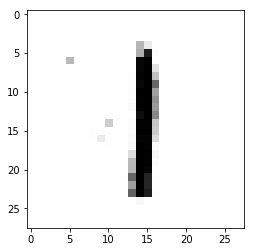

epoch: 277 gen_loss= 1.9529941 dis_loss= 0.6797517


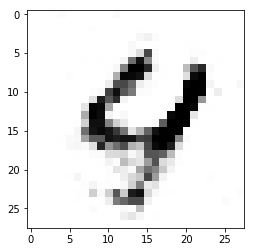

epoch: 278 gen_loss= 1.9335468 dis_loss= 0.6892985


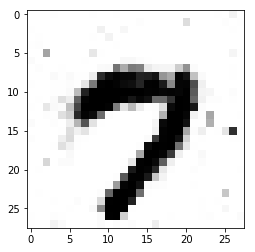

epoch: 279 gen_loss= 2.0079703 dis_loss= 0.69036365


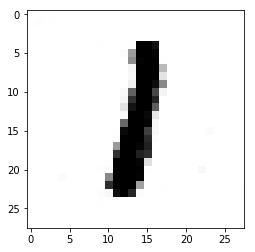

epoch: 280 gen_loss= 1.8675075 dis_loss= 0.75338304


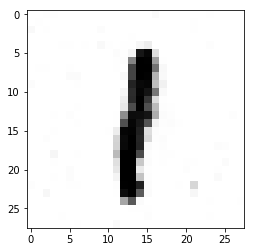

epoch: 281 gen_loss= 2.1187348 dis_loss= 0.6853086


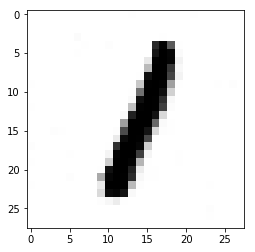

epoch: 282 gen_loss= 1.7501622 dis_loss= 0.77726424


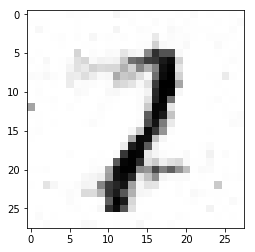

epoch: 283 gen_loss= 2.1580062 dis_loss= 0.65605295


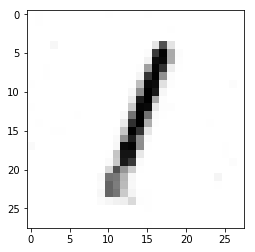

epoch: 284 gen_loss= 1.8697515 dis_loss= 0.6670992


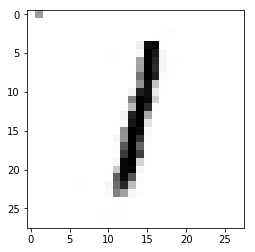

epoch: 285 gen_loss= 2.0694613 dis_loss= 0.6466367


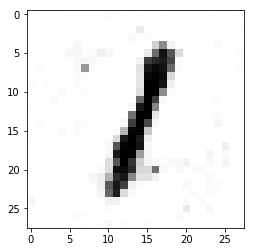

epoch: 286 gen_loss= 2.1129386 dis_loss= 0.6656699


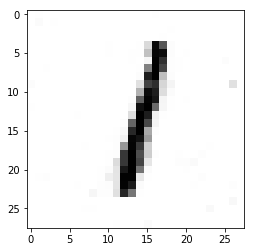

epoch: 287 gen_loss= 1.844284 dis_loss= 0.723353


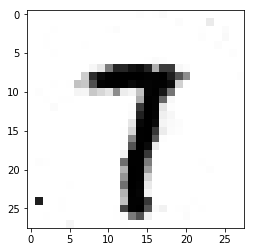

epoch: 288 gen_loss= 1.7590722 dis_loss= 0.6854759


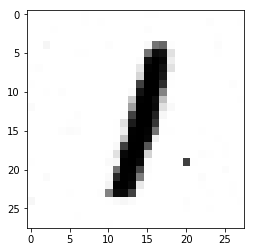

epoch: 289 gen_loss= 1.9392211 dis_loss= 0.6586053


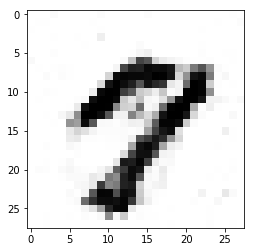

epoch: 290 gen_loss= 2.1503334 dis_loss= 0.60622483


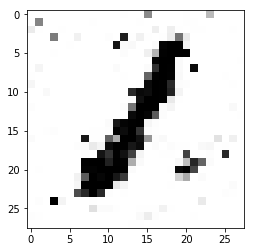

epoch: 291 gen_loss= 2.0461285 dis_loss= 0.7654295


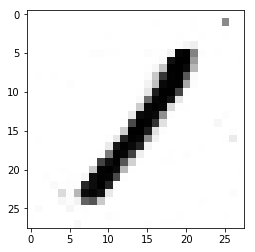

epoch: 292 gen_loss= 1.9695342 dis_loss= 0.7091053


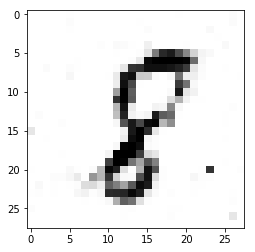

epoch: 293 gen_loss= 1.7544142 dis_loss= 0.6440599


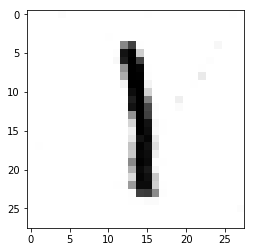

epoch: 294 gen_loss= 1.7608246 dis_loss= 0.66415524


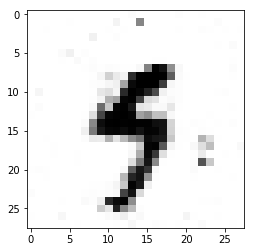

epoch: 295 gen_loss= 1.7053502 dis_loss= 0.7144911


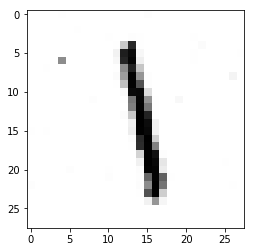

epoch: 296 gen_loss= 1.9759368 dis_loss= 0.75922304


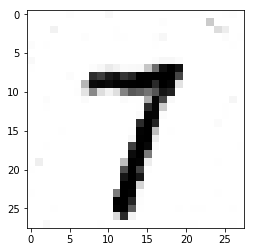

epoch: 297 gen_loss= 2.1620598 dis_loss= 0.6394578


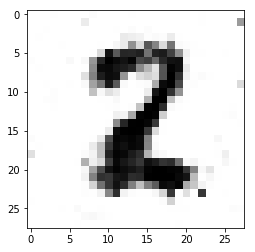

epoch: 298 gen_loss= 2.1970959 dis_loss= 0.65792584


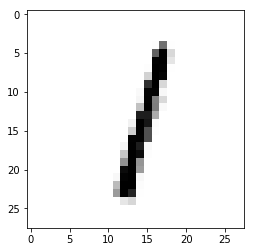

epoch: 299 gen_loss= 1.8727216 dis_loss= 0.6732025


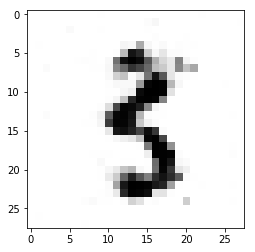

epoch: 300 gen_loss= 2.0493102 dis_loss= 0.61857855


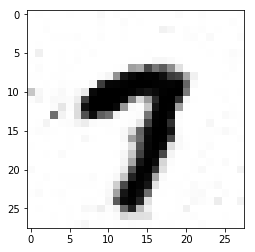

epoch: 301 gen_loss= 1.7954718 dis_loss= 0.7771734


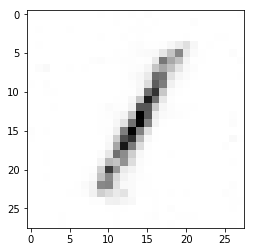

epoch: 302 gen_loss= 2.0863044 dis_loss= 0.6208697


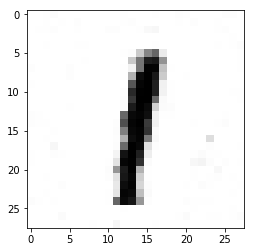

epoch: 303 gen_loss= 1.7069249 dis_loss= 0.6886563


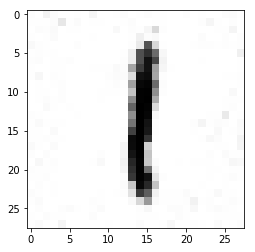

epoch: 304 gen_loss= 1.8747954 dis_loss= 0.7874913


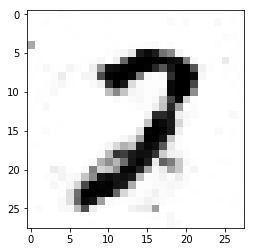

epoch: 305 gen_loss= 2.2139466 dis_loss= 0.7508187


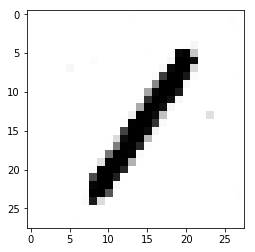

epoch: 306 gen_loss= 2.1087804 dis_loss= 0.6514089


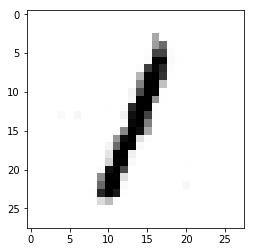

epoch: 307 gen_loss= 1.991072 dis_loss= 0.67034686


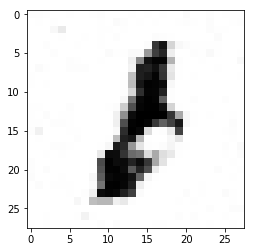

epoch: 308 gen_loss= 1.9744537 dis_loss= 0.7504475


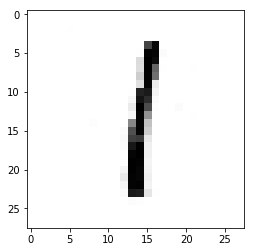

epoch: 309 gen_loss= 2.1855817 dis_loss= 0.7547882


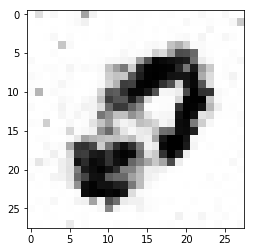

epoch: 310 gen_loss= 2.028678 dis_loss= 0.66616535


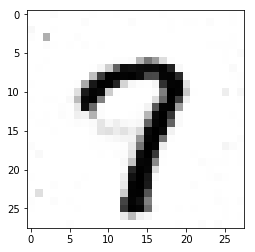

epoch: 311 gen_loss= 2.1475735 dis_loss= 0.68908876


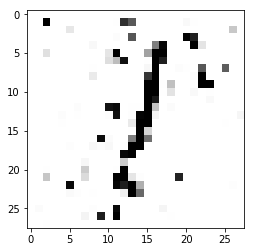

epoch: 312 gen_loss= 1.8273262 dis_loss= 0.71350044


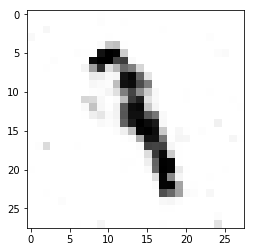

epoch: 313 gen_loss= 2.0149832 dis_loss= 0.6753714


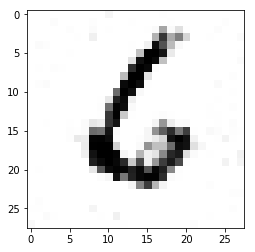

epoch: 314 gen_loss= 2.214098 dis_loss= 0.6281098


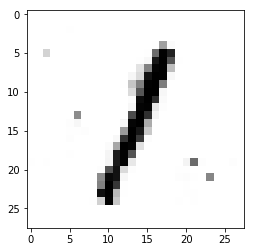

epoch: 315 gen_loss= 1.9323225 dis_loss= 0.7461017


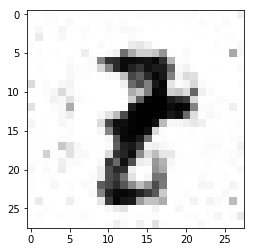

epoch: 316 gen_loss= 1.888505 dis_loss= 0.74718857


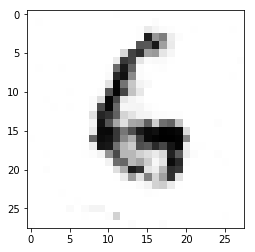

epoch: 317 gen_loss= 2.0728588 dis_loss= 0.58511585


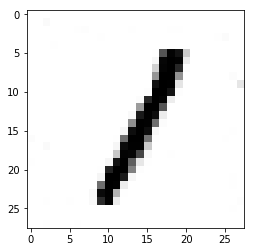

epoch: 318 gen_loss= 2.0028267 dis_loss= 0.700581


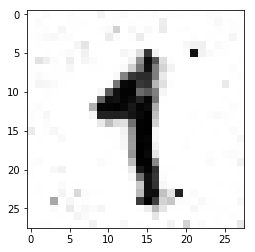

epoch: 319 gen_loss= 1.9792826 dis_loss= 0.69230384


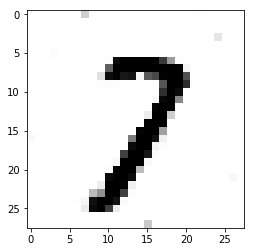

epoch: 320 gen_loss= 1.9958892 dis_loss= 0.7032738


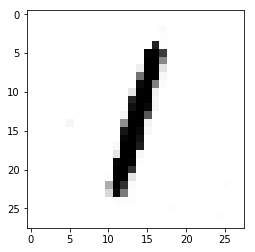

epoch: 321 gen_loss= 1.7221866 dis_loss= 0.7550012


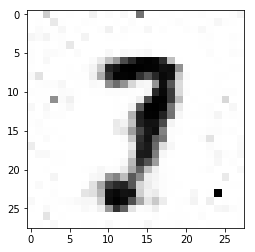

epoch: 322 gen_loss= 1.7464459 dis_loss= 0.6321558


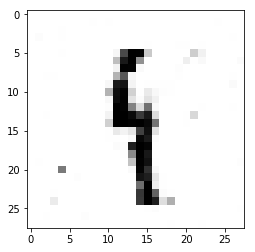

epoch: 323 gen_loss= 1.9953938 dis_loss= 0.63191646


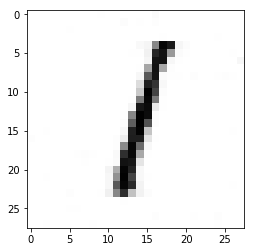

epoch: 324 gen_loss= 2.1688435 dis_loss= 0.78064334


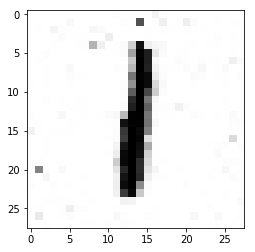

epoch: 325 gen_loss= 1.8987918 dis_loss= 0.6037116


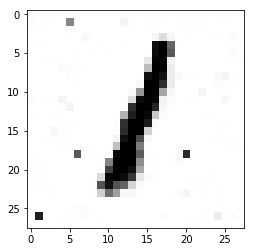

epoch: 326 gen_loss= 2.0133047 dis_loss= 0.71373767


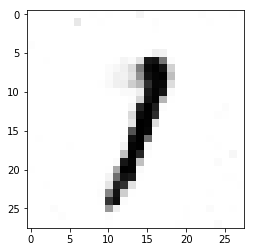

epoch: 327 gen_loss= 1.815365 dis_loss= 0.7293975


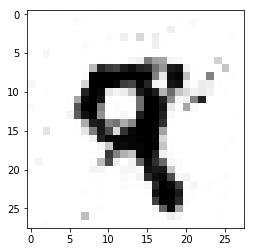

epoch: 328 gen_loss= 2.113199 dis_loss= 0.70153546


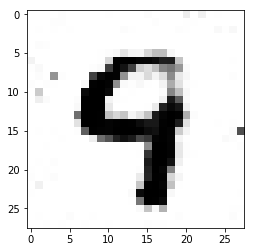

epoch: 329 gen_loss= 2.1109695 dis_loss= 0.7247838


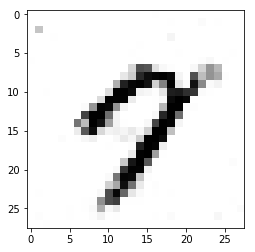

epoch: 330 gen_loss= 2.206304 dis_loss= 0.76036906


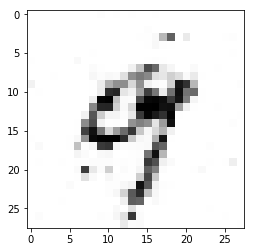

epoch: 331 gen_loss= 1.9439187 dis_loss= 0.6290912


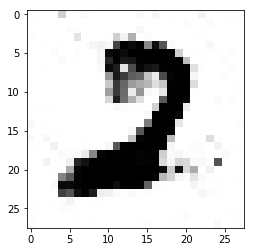

epoch: 332 gen_loss= 2.0099282 dis_loss= 0.63242936


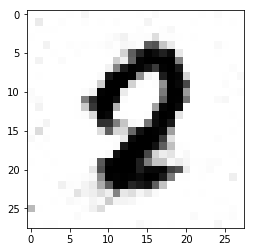

epoch: 333 gen_loss= 1.8018246 dis_loss= 0.6187583


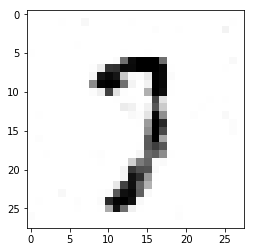

epoch: 334 gen_loss= 1.6193001 dis_loss= 0.76735115


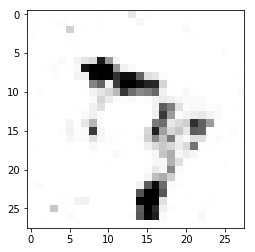

epoch: 335 gen_loss= 2.5583014 dis_loss= 0.6431246


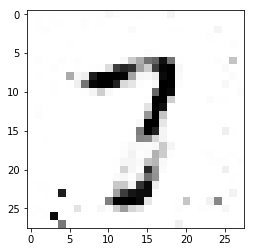

epoch: 336 gen_loss= 1.9901813 dis_loss= 0.75808316


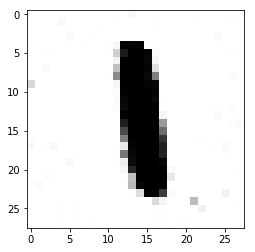

epoch: 337 gen_loss= 2.090693 dis_loss= 0.77447236


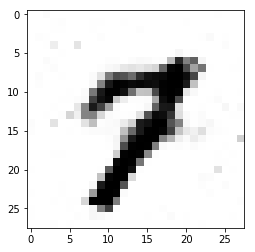

epoch: 338 gen_loss= 2.2519524 dis_loss= 0.6381781


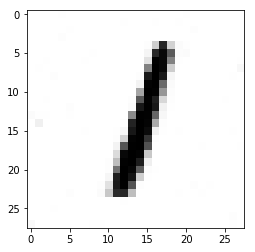

epoch: 339 gen_loss= 2.0277107 dis_loss= 0.6709436


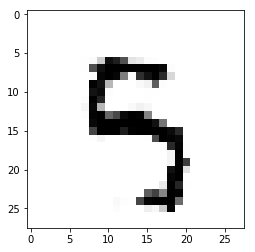

epoch: 340 gen_loss= 2.1311617 dis_loss= 0.64458966


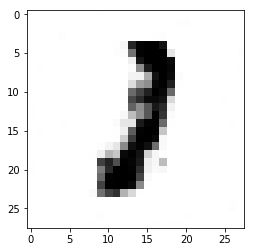

epoch: 341 gen_loss= 2.0584977 dis_loss= 0.58687717


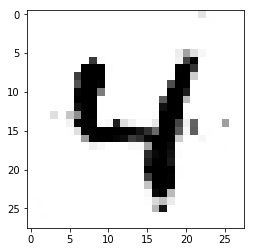

epoch: 342 gen_loss= 2.2568512 dis_loss= 0.6818022


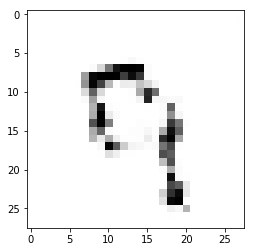

epoch: 343 gen_loss= 2.0217342 dis_loss= 0.6210598


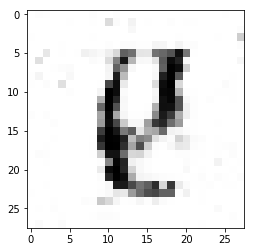

epoch: 344 gen_loss= 2.0653129 dis_loss= 0.7346694


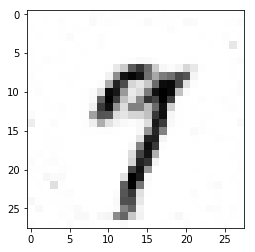

epoch: 345 gen_loss= 2.6303341 dis_loss= 0.53830385


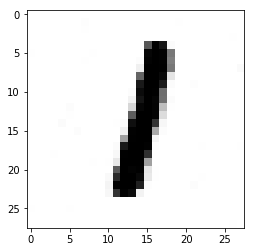

epoch: 346 gen_loss= 2.0311337 dis_loss= 0.65806806


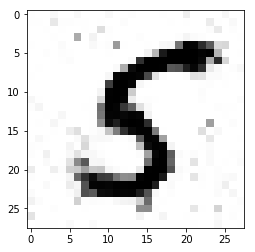

epoch: 347 gen_loss= 2.0136518 dis_loss= 0.7244337


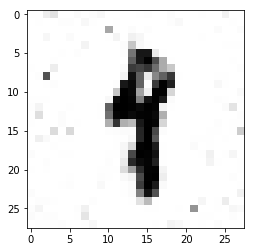

epoch: 348 gen_loss= 2.0965154 dis_loss= 0.7235106


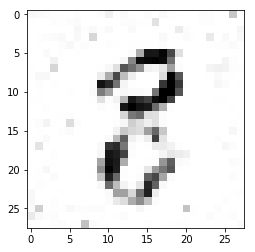

epoch: 349 gen_loss= 1.7034229 dis_loss= 0.6915504


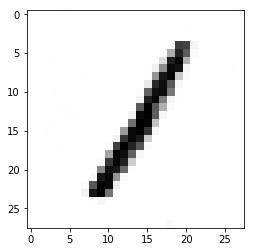

epoch: 350 gen_loss= 1.9984369 dis_loss= 0.75389385


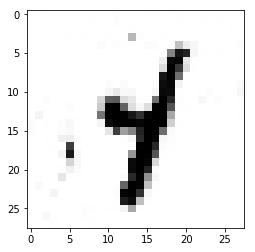

epoch: 351 gen_loss= 1.76246 dis_loss= 0.6917561


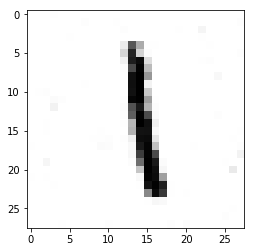

epoch: 352 gen_loss= 1.816363 dis_loss= 0.7560562


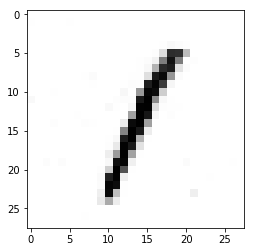

epoch: 353 gen_loss= 1.9366423 dis_loss= 0.7896943


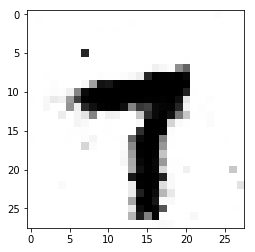

epoch: 354 gen_loss= 2.0439012 dis_loss= 0.60678226


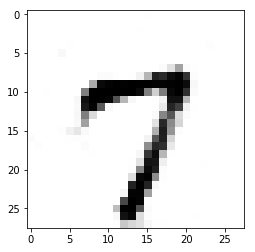

epoch: 355 gen_loss= 1.9266579 dis_loss= 0.734347


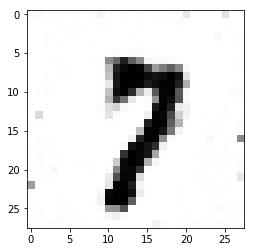

epoch: 356 gen_loss= 1.7790815 dis_loss= 0.688025


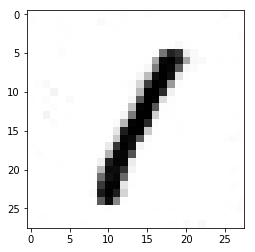

epoch: 357 gen_loss= 1.9649566 dis_loss= 0.6718073


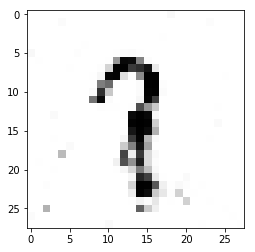

epoch: 358 gen_loss= 1.9083184 dis_loss= 0.66918737


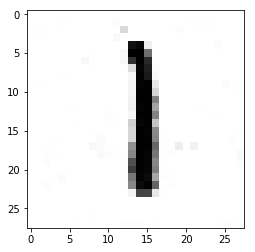

epoch: 359 gen_loss= 1.9791377 dis_loss= 0.646554


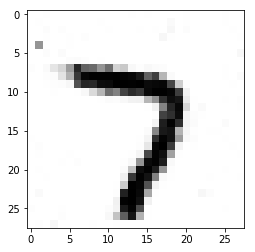

epoch: 360 gen_loss= 1.801657 dis_loss= 0.6760248


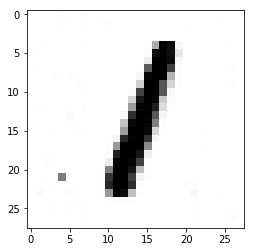

epoch: 361 gen_loss= 1.8342892 dis_loss= 0.7184193


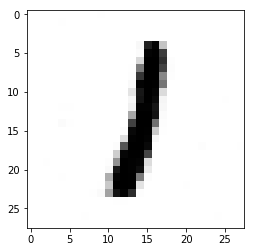

epoch: 362 gen_loss= 2.379997 dis_loss= 0.5959972


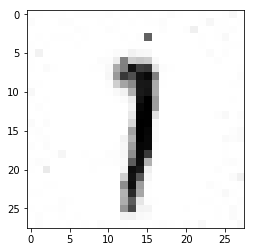

epoch: 363 gen_loss= 1.9586995 dis_loss= 0.6327037


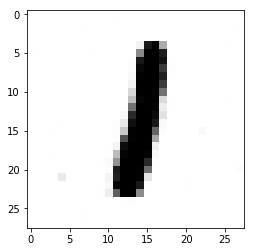

epoch: 364 gen_loss= 1.9070501 dis_loss= 0.62163794


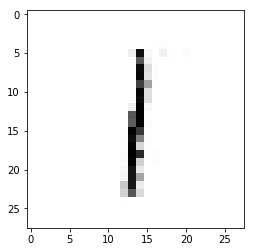

epoch: 365 gen_loss= 2.1200686 dis_loss= 0.66104066


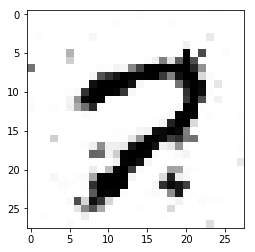

epoch: 366 gen_loss= 2.3231597 dis_loss= 0.5939245


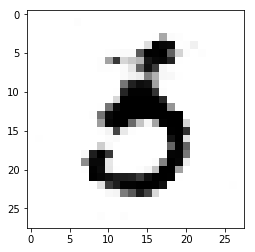

epoch: 367 gen_loss= 2.126091 dis_loss= 0.6082047


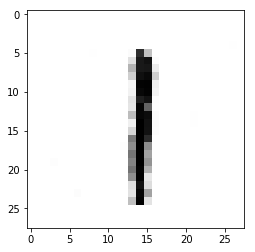

epoch: 368 gen_loss= 1.8019192 dis_loss= 0.70956063


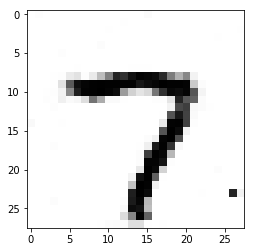

epoch: 369 gen_loss= 1.9581306 dis_loss= 0.6973312


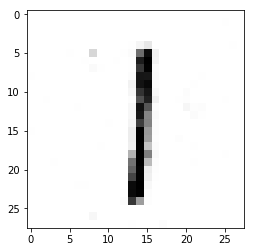

epoch: 370 gen_loss= 2.1012688 dis_loss= 0.69091284


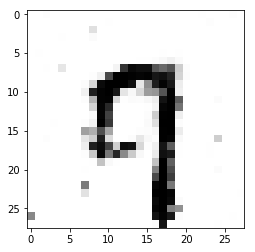

epoch: 371 gen_loss= 1.9930985 dis_loss= 0.646072


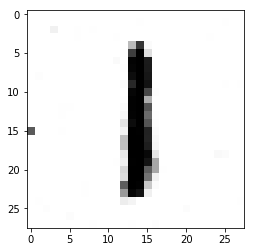

epoch: 372 gen_loss= 1.8622066 dis_loss= 0.7558347


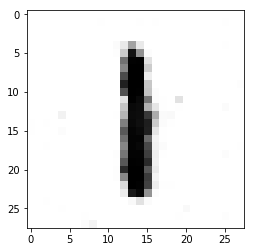

epoch: 373 gen_loss= 1.8848171 dis_loss= 0.6840521


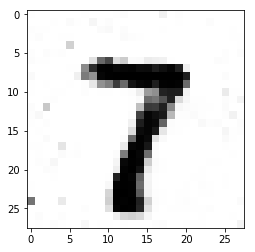

epoch: 374 gen_loss= 2.0331619 dis_loss= 0.7037517


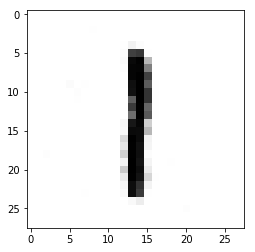

epoch: 375 gen_loss= 2.0950875 dis_loss= 0.66287595


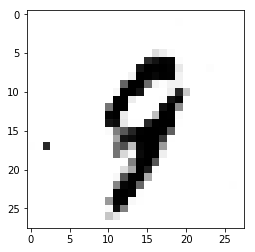

epoch: 376 gen_loss= 1.8054277 dis_loss= 0.6386547


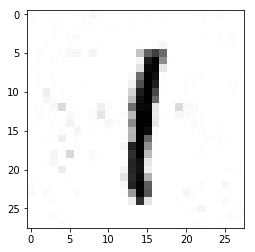

epoch: 377 gen_loss= 2.0585506 dis_loss= 0.7476871


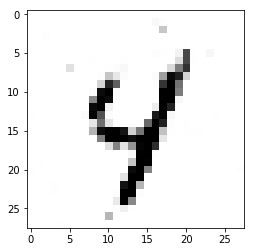

epoch: 378 gen_loss= 1.6996198 dis_loss= 0.6981107


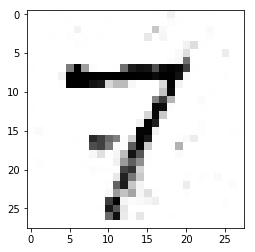

epoch: 379 gen_loss= 1.757869 dis_loss= 0.6660535


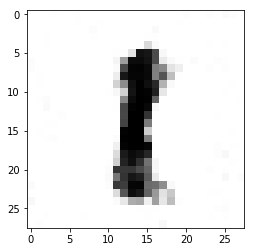

epoch: 380 gen_loss= 1.8289626 dis_loss= 0.7876941


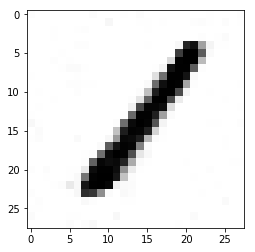

epoch: 381 gen_loss= 1.7970965 dis_loss= 0.6558036


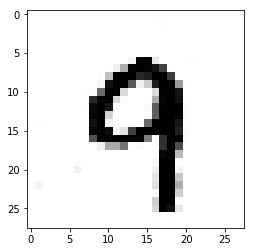

epoch: 382 gen_loss= 1.7408427 dis_loss= 0.80240124


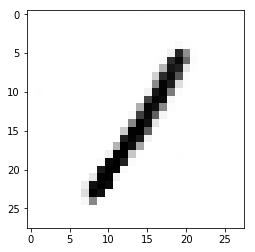

epoch: 383 gen_loss= 1.8763833 dis_loss= 0.66179585


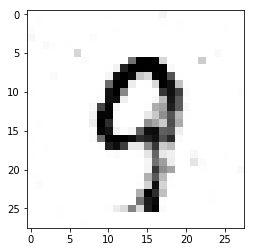

epoch: 384 gen_loss= 1.8608456 dis_loss= 0.70519704


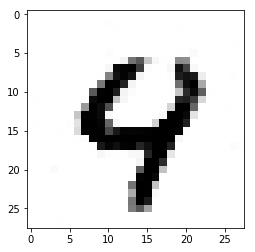

epoch: 385 gen_loss= 1.937208 dis_loss= 0.7876317


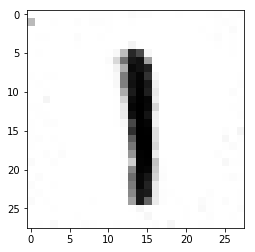

epoch: 386 gen_loss= 2.19475 dis_loss= 0.62903476


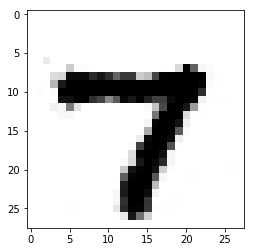

epoch: 387 gen_loss= 2.064775 dis_loss= 0.68633914


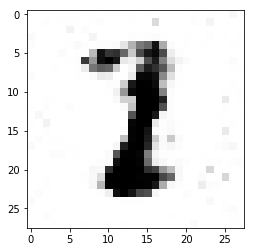

epoch: 388 gen_loss= 1.8741959 dis_loss= 0.7543691


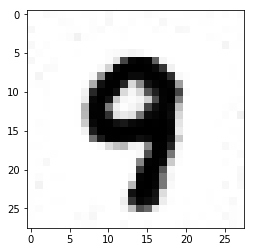

epoch: 389 gen_loss= 1.9486368 dis_loss= 0.65866864


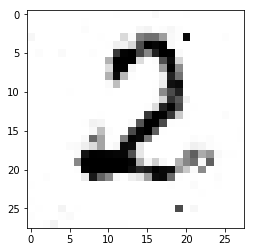

epoch: 390 gen_loss= 2.4577155 dis_loss= 0.6424578


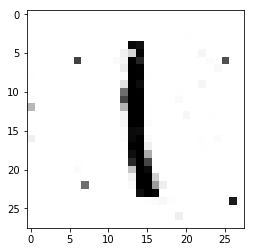

epoch: 391 gen_loss= 2.0250518 dis_loss= 0.66591126


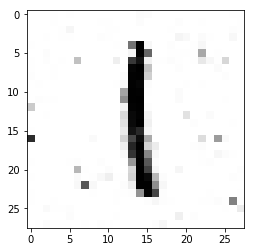

epoch: 392 gen_loss= 2.3869445 dis_loss= 0.56333745


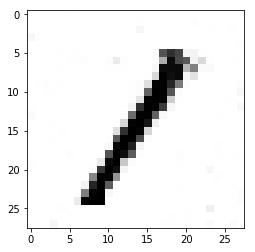

epoch: 393 gen_loss= 2.0859206 dis_loss= 0.57984054


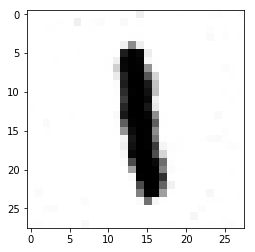

epoch: 394 gen_loss= 2.0452886 dis_loss= 0.69981116


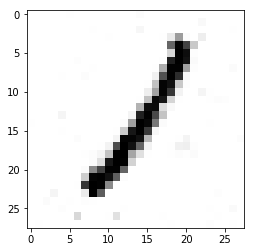

epoch: 395 gen_loss= 1.9492999 dis_loss= 0.6794844


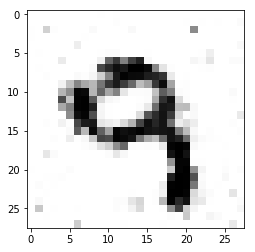

epoch: 396 gen_loss= 2.135492 dis_loss= 0.69080704


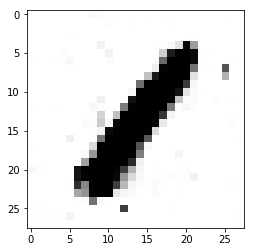

epoch: 397 gen_loss= 1.7434871 dis_loss= 0.7200608


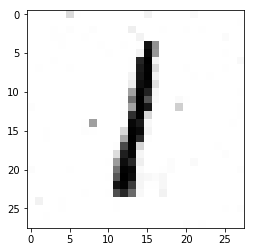

epoch: 398 gen_loss= 2.032005 dis_loss= 0.64047885


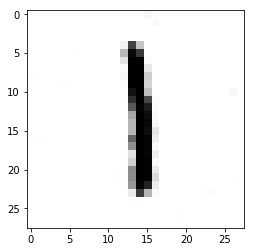

epoch: 399 gen_loss= 1.9786444 dis_loss= 0.66907823


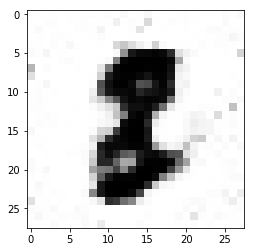

In [63]:
generated_200 = []
generated_400 = []
generated_500 = []

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        num_batches = int(mnist.train.num_examples/batch_size)
        
        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2-1
            
            batch_z = np.random.uniform(-1, 1, size= (batch_size, 100))
            
            _, dloss = sess.run([train_dis, dis_total_loss], feed_dict={X:batch_images, z: batch_z})
            _, gloss= sess.run([train_gen, gen_loss], feed_dict={z: batch_z})
            
        print("epoch:", epoch, "gen_loss=", gloss, "dis_loss=", dloss)
        
        summary = sess.run(g_loss, feed_dict={z:batch_z})
        write_gen_loss.add_summary(summary, epoch)
        write_gen_loss.flush()
        
        summary_2 = sess.run(d_loss, feed_dict={X:batch_images, z: batch_z})
        write_dis_loss.add_summary(summary_2, epoch)
        write_dis_loss.flush()
        
        sample_z = np.random.uniform(-1, 1, size= (1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict= {z:sample_z})
        
        plt.imshow(gen_sample.reshape((28, 28)), cmap='Greys')
        plt.show()
        
        if epoch%50 == 0:
            saver.save(sess, "./GAN.ckpt")
        if epoch%100==0 and epoch!=200:
            for i in range(16):
                sample_z = np.random.uniform(-1, 1, size= (1, 100))
                gen_sample = sess.run(generator(z, reuse=True), feed_dict= {z:sample_z})

                generated_200.append(gen_sample)
                
        elif epoch%200 ==0:
            for i in range(16):
                sample_z = np.random.uniform(-1, 1, size= (1, 100))
                gen_sample = sess.run(generator(z, reuse=True), feed_dict= {z:sample_z})

                generated_400.append(gen_sample)
    
    for i in range(16):
        sample_z = np.random.uniform(-1, 1, size= (1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict= {z:sample_z})

        generated_500.append(gen_sample)

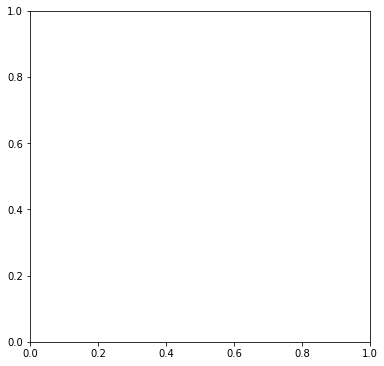

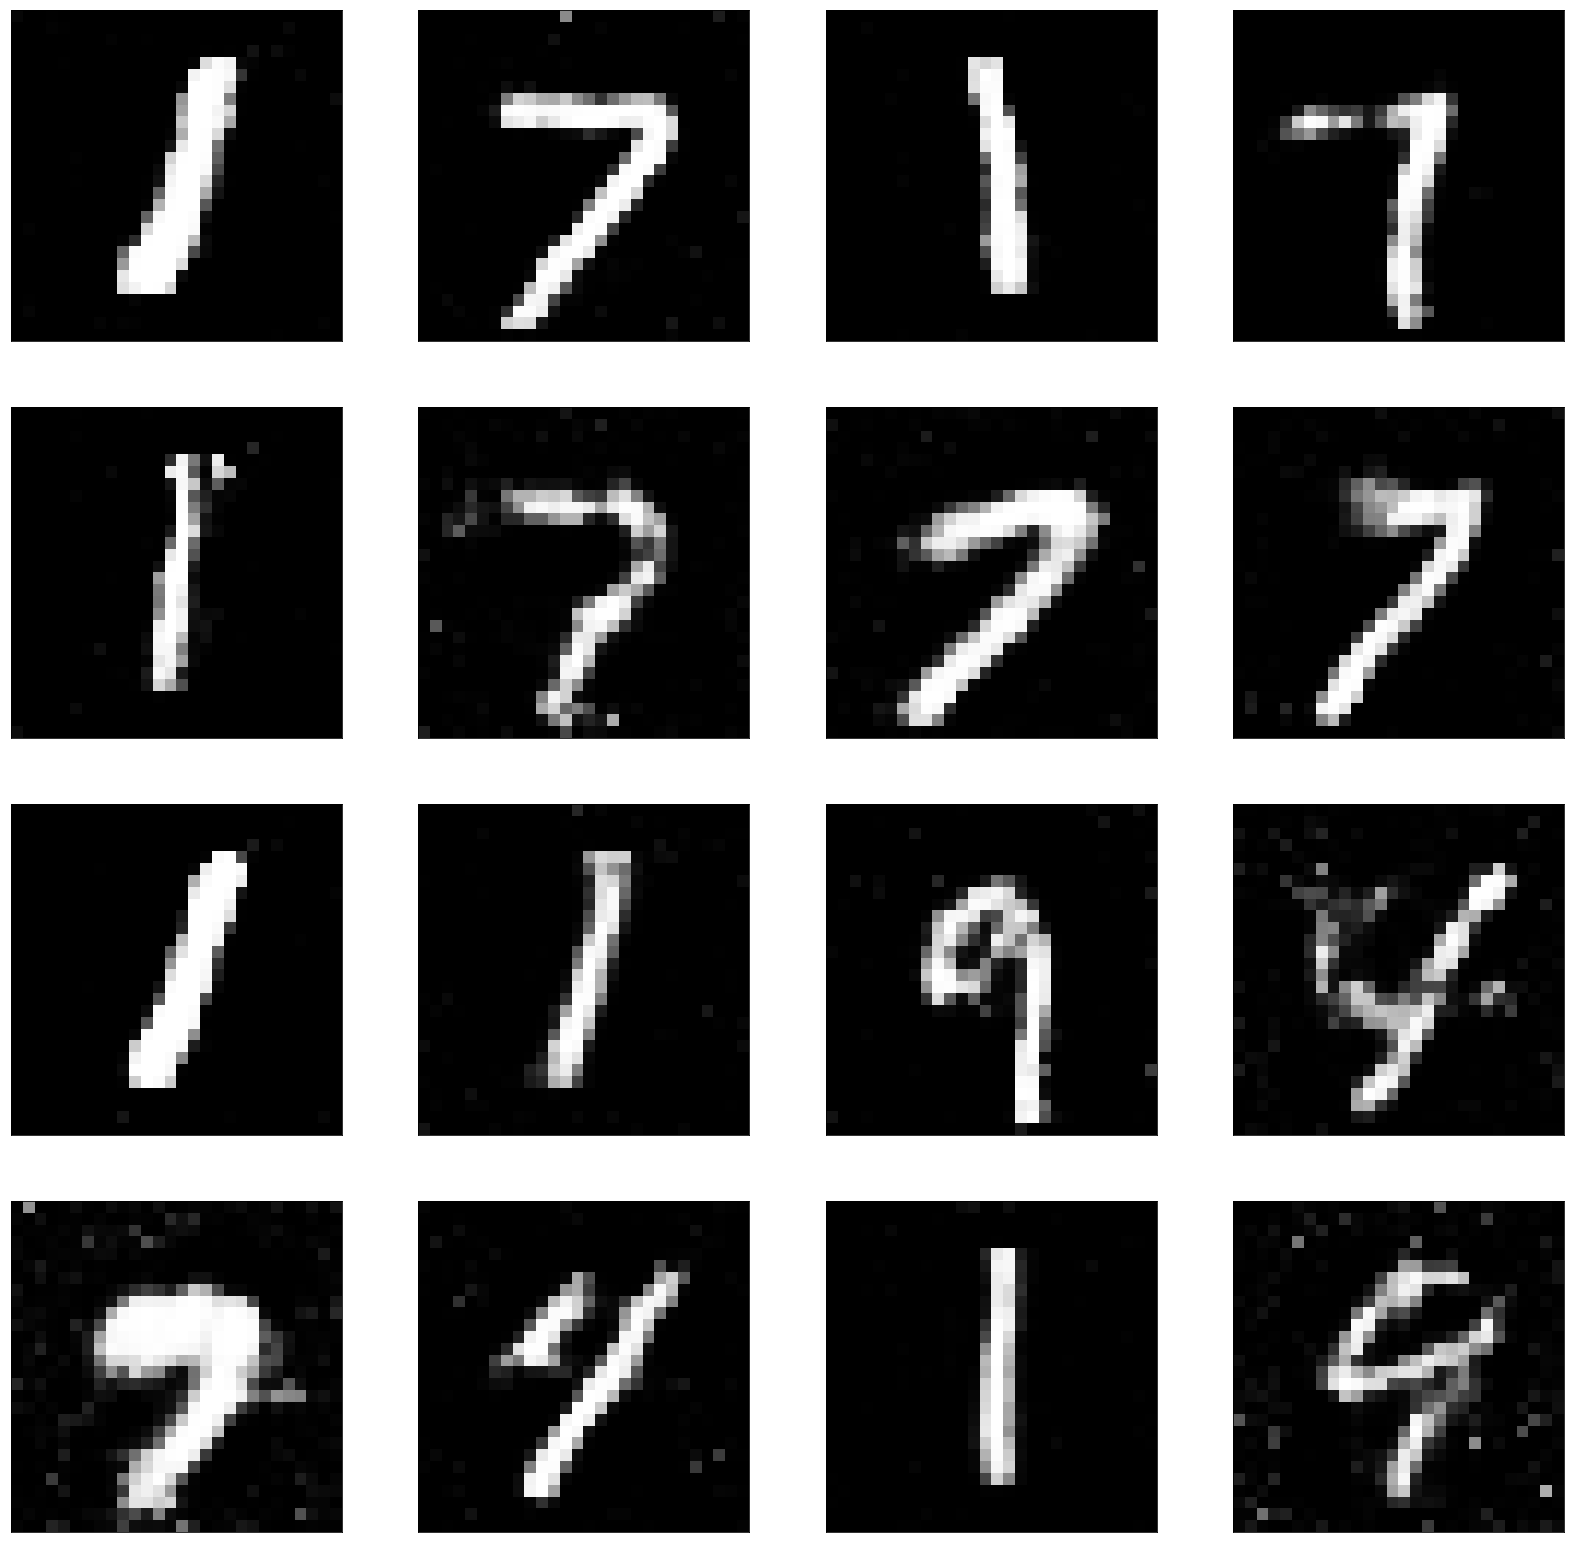

In [68]:
### Images after 200 epochs ###

plt.figure(figsize = (28,28))
for i in range(16):
    #displaying original
    ax = plt.subplot(4,4,i+1)
    plt.imshow(generated_500[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()